# Progetto FAD 25-26

Progetto di gruppo per il corso di *Fondamenti di Analisi dei Dati* — A.A. 2025/2026

**Nome del gruppo**: *The Bayesians*

**Membri del gruppo**:
- *Filippo Falzone*  
- *Francesco Greco*

Il progetto si basa sullo studio di un dataset contenente informazioni circa varie automobili vendute.
I dati sono stati raccolti in India e le auto vendute sono usate. Quindi lo studio si baserà sul comprendere il mercato delle automobili usate in India.

---

## 1. Analisi dei dati

Questa fase iniziale è dedicata alla **comprensione approfondita del dataset**. Si procederà nel seguente ordine:
- Data Understanding
- Data Cleaning & Preparation
- Analisi Esplorativa
- Inferenza Statistica

### 1.1 Data Understanding

Ci concentreremo sull'iniziare a conoscere il dataset, comprendendo a fondo il significato di ogni variabile e formulando alcune domande su cui strutturare le successive fasi dell'analisi dei dati. 

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv('../../data_set/train-data.csv', index_col=0)

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Vediamolo nel dettaglio:

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


Il nostro dataset ha **13 caratteristiche** (colonne) e **6019 osservazioni** (righe).

Adesso creiamo un dizionario dei dati, in modo da avere una comprensione maggiore delle varie caratteristiche.

**Dizionario dei Dati**
| Variabile             | Tipo / Scala                     | Descrizione                                                                                         | Unità |
| --------------------- | -------------------------------- | --------------------------------------------------------------------------------------------------- | ------------ |
| **Name**              | Qualitativa / Nominale           | Combinazione di marchio e modello dell’auto. | –            |
| **Location**          | Qualitativa / Nominale           | Città o regione in cui l’auto è in vendita.                                                         | –            |
| **Year**              | Numerica / Discreta / Intervalli | Anno di produzione del modello.                | –            |
| **Kilometers_Driven** | Numerica / Continua / Ratio      | Chilometri totali percorsi dall’auto.                                                               | km           |
| **Fuel_type**         | Qualitativa / Nominale           | Tipo di carburante utilizzato dall’auto.                                                            | –            |
| **Transmission**      | Qualitativa / Nominale            | Tipo di trasmissione: `automatica` o `manuale`.                                                         | –            |
| **Owner_Type**        | Qualitativa / Ordinale           | Indica il numero di proprietari precedenti che il veicolo ha avuto prima del venditore attuale. Le categorie sono ordinate per numero crescente di proprietari: `first_hand` (il venditore è il primo proprietario), `second_hand`, `third_hand`, e `fourth_above` (quattro o più proprietari).                            | –            |
| **Mileage**           | Numerica / Continua / Ratio      | Consumo di carburante dell’auto.                                               | kmpl o km/kg |
| **Engine**            | Numerica / Continua / Ratio      | Cilindrata del motore.                                                                              | cc           |
| **Power**             | Numerica / Continua / Ratio      | Potenza massima del motore.                                                                         | bhp          |
| **Seats**             | Numerica / Discreta / Ratio      | Numero di posti a sedere.            | –            |
| **New_Price**         | Numerica / Continua / Ratio      | Rappresenta il prezzo di un auto nuova dello stesso modello.                                                         | INR Lakhs    |
| **Price**             | Numerica / Continua / Ratio      | Prezzo di vendita dell’auto usata.                 | INR Lakhs    |


Alcune considerazioni sulle variabili:
- da `Name` potremmo estrarre marchio dell'auto
- da `Year` possiamo calcolare l'età dell'auto
- `Transmission` è una variabile binaria (ha solo due possibili categorie)
- modifica di `Owner_Type` in modo da renderla discreta ordinale
- `Seats` può aiutare a classificare il veicolo (SUV, sportiva, etc...)
- individuiamo `Price` come variabile target da predire per nuove osservazioni

**Obiettivi dell'Analisi dei Dati**


Dopo aver descritto e compreso le varie caratteristiche del dataset abbiamo formulato alcuni **obiettivi** su cui basare la nostra analisi dei dati, che ricordiamo basarsi sullo studio del mercato di auto usate in India:
- Quali sono i fattori principali che determinano il prezzo (`Price`) di un'auto usata? 
- In che modo l'età dell'auto (derivata da `Year`) e i chilometri percorsi (`Kilometers_Driven`) interagiscono nel definire il valore?
- Quale impatto hanno le caratteristiche tecniche come il motore o la potenza (`Engine` o `Power`) e il tipo di cambio (`Transmission`) sul prezzo?
- Esistono marche (estratte da `Name`) o località (`Location`) specifiche in cui le auto mantengono meglio il loro valore?  

---

### 1.2 Data Cleaning & Preparation

È molto importate preparare il dataset prima di poter iniziare ad analizzare le variabili e come essere sono correlate. Questo perché eventuali valori mancanti o anomalie (outlier) ci porterebbo a conclusioni errate o inconsistenti.

Cominciamo dando un occhiata ai **valori mancanti** (Nan) presenti nelle nostre colonne:

In [133]:
print(df.isna().sum())

print("")

print("---- NaN percentage per variable ----")
for x in df:
    if df[x].isnull().sum() > 0:
        value = (df[x].isna().sum()/len(df[x])) * 100
        print(f"{x}: {value:.2f}%")

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

---- NaN percentage per variable ----
Mileage: 0.03%
Engine: 0.60%
Power: 0.60%
Seats: 0.70%
New_Price: 86.31%


Vediamo che la maggior parte delle colonne contengono una **quantità irrilevanti di valori mancati**. Quelli che sono presenti (i missing values) si possono sistemare facilmente: o eliminiamo quelle righe, o facendo un'imputazione, o infine applicando Feature Engineering.

Tuttavia `New_Price` è un **disastro**: 5195 su 6019 righe sono vuote. Parliamo dell'86% dei dati.

- **Imputazione**: impossibile, Il prezzo di listino dello stesso modello è troppo specifico; non possiamo stimarlo tramite le caratteristiche presenti in questo dataset. Introdurebbe bias.

- **Rimozione**: Avere così tanti buchi rende la colonna inutile sia per un analisi e sia per la fase di modeling. Non possiamo farci affidamento. E' la scelta più pragmatica in questo caso.

Verifichiamo se nel nostro dataset sono presenti **righe duplicate**, che porterebbero ad un analisi non corretta, e nel caso eliminarle:

In [134]:
duplicate_count = df.duplicated().sum()

df.drop_duplicates(inplace=True)

print(f"Rimosse di n. righe duplicate: {duplicate_count}")


Rimosse di n. righe duplicate: 0


Adesso eseguiremo **per ogni feature** un processo di Data Cleaning che includerà:
- gestione dei Valori Mancanti
- Correzzione di Inconsistenze e Formattazione 
- Gestione degli outliers

**1. `Name`**

Ricordiamo che 'Name' contiene il brand dell'auto osservazione.

Inoltre, come abbiamo verificato poco fa, non contiene valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Per la variabile 'Name', che include il brand veicolo, abbiamo deciso di fare Feature Extraction per scomporre questa stringa in una nuova variabile: Brand. Questo perché, anche se la variabile 'Name' è pulita, l'analisi e la modellazione predittiva non traggono molti benefici da variabili con troppi valori unici. 

Creeremo quindi la nuova variabile Brand estraendola dalla stringa originale.

In [135]:
df['Brand'] = df['Name'].str.split(' ').str[0]
df = df.drop('Name', axis=1)

first_col = ['Brand']

remaining_cols = [col for col in df.columns if col not in first_col]

df = df[first_col + remaining_cols]

print("Brand creato e inserito come prima colonna.")

df = df.reset_index(drop=True)

df.head()

Brand creato e inserito come prima colonna.


,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Controlliamo se è tutto corretto:

In [136]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [137]:
df['Brand'].value_counts()

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Isuzu               1
Ambassador          1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

Due situazioni risaltano all'occhio, una più banale e un'altra da gestire: 
- ISUZU deve essere modificata in Isuzu e unita ad essa
- Ci sono tanti Brand con pochi elementi, questo porterebbe tali brand a non essere statisticamente rilevanti.

Come detto precedentemente, in futuro vorremmo usare questi dati per creare modelli predittivi, ma l'uso di questa variabile 'Brand' può essere abbastanza complicato per via della moltitudine di valori unici che ha. Per questo motivo, per prevenire quello che viene chiamato 'Overfittig' abbuamo deciso di categorizzare i vari brand in 5 categorie. Il compito del mapping Brand:Categoria è stato affidato ad un LLM (Gemini), le categorie sono:
- Luxury High-End: Brand di altissimo prestigio e prestazioni (es. Porsche, Land Rover, Jaguar, Bentley).
- Premium: Il lusso classico, molto comune ma costoso (es. Mercedes-Benz, BMW, Audi, Volvo).
- Executive/Upper-Mid: Brand affidabili con prezzi medi-alti, spesso scelti per qualità costruttiva (es. Honda, Toyota, Volkswagen, Skoda, Jeep).
- Mass-Market (Budget-Friendly): I brand più diffusi, economici e con molta tenuta del valore nell'usato (es. Maruti, Hyundai, Tata, Ford, Mahindra).
- Entry-Level/Others: Brand minori o molto economici (es. Datsun, Renault, Fiat, Chevrolet).

In [138]:
# 1. Pulizia iniziale: Lowercase per evitare errori di battitura (es. 'Audi' vs 'audi')
df['Brand'] = df['Brand'].astype(str).str.strip().str.capitalize()

# 2. Controllo ed eliminazione duplicati (se presenti nel dataset intero)
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    print(f"Rimossi {duplicates_count} record duplicati.")
    df.drop_duplicates(inplace=True)

brand_categories = {
    'Luxury': ['Audi', 'Land', 'Mercedes-Benz', 'BMW', 'Porsche', 'Jaguar', 'Bentley', 'Lamborghini'],
    'Premium': ['Volvo', 'Mini', 'Jeep', 'Isuzu', 'ISUZU'],
    'Executive': ['Honda', 'Toyota', 'Volkswagen', 'Skoda', 'Mitsubishi'],
    'Mass-Market': ['Hyundai', 'Nissan', 'Tata', 'Mahindra', 'Ford', 'Chevrolet', 'Fiat', 'Renault'],
    'Entry-Level': ['Maruti', 'Datsun', 'Smart', 'Ambassador', 'Force']
}

flat_mapping = {
    b.capitalize(): cat for cat, brands in brand_categories.items() for b in brands}

df['Brand'] = df['Brand'].astype(str).str.capitalize()

df['Brand_Category'] = df['Brand'].map(flat_mapping).fillna('Other')

print(df[['Brand', 'Brand_Category']].head())

Rimossi 1 record duplicati.
     Brand Brand_Category
0   Maruti    Entry-Level
1  Hyundai    Mass-Market
2    Honda      Executive
3   Maruti    Entry-Level
4     Audi         Luxury


**2. `Location`**

Ricordiamo che 'Location' contiene il luogo in cui l'auto è stata venduta.

Come abbiamo verificato prima 'Location' non contiene valori mancanti.

Non sono necessari controlli su questa variabile, potremmo controllare se i nomi dei luoghi assunti da essa **esistono veramente**. Lo faremo ma solo per ottenere **informazioni circa i luoghi** in cui queste auto sono state rivendute:

In [139]:
print(df['Location'].unique())
print("")
print(df['Location'].value_counts())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']

Location
Mumbai        790
Hyderabad     741
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: count, dtype: int64


Abbiamo esaminato i luoghi riportati sopra, non solo essi non sono frutto di errore o fantasia, ma sono tutte **grandi città metropolitane** indiane.

Non è necessario alcun controllo degli outlier per questa variabile.

**3. `Year`**

Questa variabile indica l'anno in cui l'auto è stata prodotta.

Come visto prima non contiene valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Per questa variabile non servono particolari controlli di questo tipo. Ma possiamo applicare pure qui un po di Feature Engeneering per trarre l'età dell'auto. Questo perché vogliamo cambiare la scala da intervalli a ratio, e inoltre in questo modo abbiamo a disposizione numeri più piccoli.
Sembra che il dataset utilizzi come anno di riferimento il 2019, quindi l'età è la differenza Anno_di_produzione - Year.

Creeremo quindi la variabile `Age`:

In [140]:
current_year = 2019

index_year = df.columns.get_loc('Year')
age_values = current_year - df['Year']
df.insert(index_year, 'Age', age_values)
df.drop('Year', axis=1, inplace=True)

print('Age creata.')

Age creata.


*Gestione degli Outlier*

Inizieremo mostrando un boxplot per questa variabile:

<Axes: >

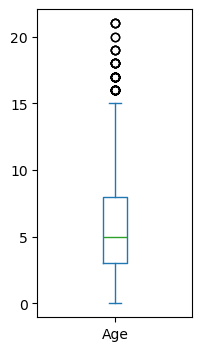

In [141]:
df['Age'].plot.box(figsize=(2,4))

Age (Year) non presenta molti outlier, con molta probabilità sono auto molto vecchie che seguono normative ed un mercato differente, che potrebbero portare solamente a confusione, inoltre, oltre una certa soglia non è manco più statisticamente rilevante l'età. Abbiamo scelto di rimuovere le auto più vecchie di 14 anni (2005).

In [142]:
threshold = 14
auto_vecchie = df[df['Age'] > threshold]

df = df[df['Age'] <= threshold]
df.reset_index(drop=True, inplace=True)

print(f"Numero di auto rimosse: {len(auto_vecchie)}")

Numero di auto rimosse: 81


**4. `Kilometers_Driven`**

Questa variabile contiene quanti chilometri ha percorso l'auto.

Come abbiamo verificato prima 'Location' non contiene valori mancanti.

Questa variabile è gia pulita, non ci sono particolari controlli da fare.

*Gestione degli outliers*

Inizieremo plottando un boxplot:

<Axes: >

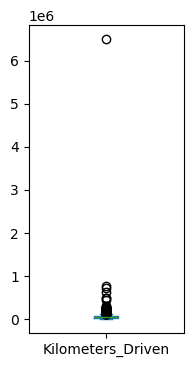

In [143]:
df['Kilometers_Driven'].plot.box(figsize=(2,4))

Si nota subito quel numero spaventoso lì in alto, sicuramente impossibile. Sicuramente un errore. Meglio rimuoverlo.

Ci aspetteremmo comunque che auto che superino il milione di chilometri percorsi siano outliers. Perché potrebbero essere sia errori dovuti all'inserimento e sia auto molto molto vecchie.

In [144]:
print("Outlier estremi:")
print(df[df['Kilometers_Driven'] >= 1000000])

df = df[df['Kilometers_Driven'] < 1000000]
df.reset_index(drop=True, inplace=True)

Outlier estremi:
     Brand Location  Age  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2300   Bmw  Chennai    2            6500000    Diesel    Automatic      First   

         Mileage   Engine    Power  Seats New_Price  Price Brand_Category  
2300  15.97 kmpl  2993 CC  258 bhp    5.0       NaN   65.0         Luxury  


Plottiamo di nuovo il boxplot:

<Axes: >

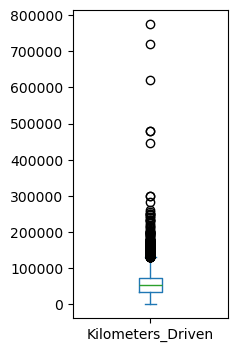

In [145]:
df['Kilometers_Driven'].plot.box(figsize=(2,4))

Vogliamo sistemare questi outlier imputando il 99° percentile. Perché i valori sono troppo distanti, potrebbe portare solo che rumore al modello. Inoltre nel mercato odierno già sopra un tot chilometri sarebbero da rottamare le auto. Quindi potremmo usare il 99° percentile proprio per dire al modello di considerare l'auto massimamente usata, dato che dopo una certa soglia non c'è quasi nulla più da togliere. 

Soglia (99%): 170000 km


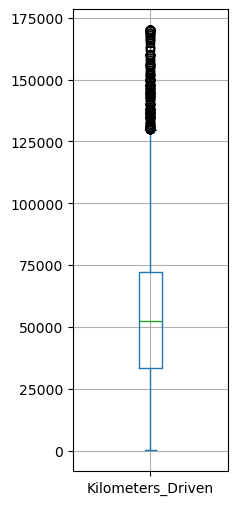

In [146]:
soglia_99 = df['Kilometers_Driven'].quantile(0.99)
print(f"Soglia (99%): {soglia_99:.0f} km")

df['Kilometers_Driven'] = np.where(df['Kilometers_Driven'] > soglia_99, 
                                   soglia_99, 
                                   df['Kilometers_Driven'])

df.reset_index(drop=True, inplace=True)

df['Kilometers_Driven'].plot.box(figsize=(2,6))
plt.grid()
plt.show()

**5. `Fuel_Type`**

'Fuel_Type' contiene il tipo di carburante utilizzato dall'auto.

Come abbiamo verificato prima 'Fuel_Type' non contiene valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [147]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3187
Petrol      2681
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

Notiamo subito il duopolio Diesel e Petrol, poi ci sono alcune nicchie. 

La presenza di auto che fanno uso di 'CNG' e 'LPG' e di auto elettriche è un po' problematica. La poca presenza nel dataset potrebbe indicare che c'è **poco mercato** nella regione di studio per auto di questa tipologia.

Inoltre, come vedremo più avanti, la caratteristica `Mileage` (chilometri percorsi per quantità utilizzata di carburante) utilizza due differenti unità di misura: una per 'Diesel' e 'Petrol ed una per 'LPG' e 'CNG', addirittura ha valori nulli per 'Electric'. Rendendo più complessa la loro gestione.

Data la scarsità di informazioni e la bassa rappresentatività di queste nicchie, uno studio approfondito che le includa risulterebbe eccessivamente complesso e poco significativo.

Pertanto, per ottimizzare l'analisi, la decisione è di escludere le tipologie di carburante 'Electric', 'CNG' e 'LPG' dal dataset.

In [148]:
df = df[(df['Fuel_Type'] != 'Electric') & (df['Fuel_Type'] != 'CNG') & (df['Fuel_Type'] != 'LPG')]

df = df.reset_index(drop=True)

print("Nicchie rimosse.")

Nicchie rimosse.


**6. `Transmission`**

Contiene un'etichetta, ovvero il tipo di cambio dell'auto.

Come visto prima non ha valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [149]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

Assume solamente due etichette, se l'auto e manuale o automatica. In futuro possiamo farla diventare una variabile discreta binaria per una possibile modellazione.

**7. `Owner_Type`**

Contiene un'etichetta, ovvero quanti proprietari aveva l'auto al momento della vendita.

Come visto prima non ha valori mancanti.

*Correzzione di Inconsistenze e Formattazione*

Facciamo un controllo sul tipo di valori che può assumere questa variabile:

In [150]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [151]:
df['Owner_Type'].value_counts()

Owner_Type
First             4845
Second             922
Third               93
Fourth & Above       8
Name: count, dtype: int64

Essendo molto poche le auto di quarta mano, potremmo combinarle insieme alla terza. 

In [152]:
df['Owner_Type'] = df['Owner_Type'].replace('Fourth & Above', 'Third')

Non sembrano esserci ulteriori problemi, in futuro potremmo farla diventare una variabile numerica discreta per la parte di modeling.

**8. `Mileage`**

Contiene l'efficienza del motore dell'auto.

Verifichiamo il numero di valori mancanti:

In [153]:
print("Valori mancanti:", df['Mileage'].isna().sum())

Valori mancanti: 0


*Correzzione di Inconsistenze e Formattazione*

Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [154]:
df_mileage = df['Mileage'].dropna()

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_mileage.astype(str).str.match(pattern)

total_obs = len(df_mileage)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
mileage_units = df_mileage.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
mileage_units.unique()

Conformi: 5868
Non conformi: 0

---- Unità di misura presenti ----


array(['kmpl'], dtype=object)

Per nostra fortuna tutte le righe **seguono la formattazione prevista**. L'altra unità di misura probabilmente corrispondeva con i carburanti CNG o LPG.

Procediamo con l'estrarre i valori numerici:

In [155]:
df['Mileage'] = df['Mileage'].str.split(' ').str[0]
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

df['Mileage'] = df['Mileage'].astype('int64')

print("Valori estratti.")

Valori estratti.


*Gestione degli Outliers*

Plottiamo il boxplot:

<Axes: >

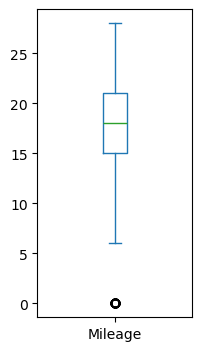

In [156]:
df['Mileage'].plot.box(figsize=(2,4))

Notiamo che abbiamo dei valori molto vicini a zero, auto che hanno un alta efficienza esistono, ma valori così bassi sono impossibili.

In [157]:
print(f"Valori per mileage inaccettabili: {len(df[df['Mileage'] <= 0])}")

Valori per mileage inaccettabili: 56


Queste righe sono i valori inaccettabili, sono outliers. Per così poche osservazione non ne vale la pena imputare valori, introdurebbe solo bias, per questo abbiamo deciso di rimuovere queste osservazioni.

In [158]:
df = df[df['Mileage'] > 0]
df = df.reset_index(drop=True)

print("Righe rimosse.")

Righe rimosse.


**9. `Engine`**

Assume come valore la cilindrata in CC (centimetri-cubi) del motore dell'auto.

Per poterla utilizzare in modo significativo in qualsiasi analisi bisogna estrarne il valore e trasformare questa variabile in numerica.

*Gestione dei valori mancanti*

In [159]:
print("Valori mancanti:", df['Engine'].isna().sum())

Valori mancanti: 23


Meno del 1% delle osservazioni ha un valore mancante per Engine.

Potremmo imputare il valore inserendo al media dei valori (più robusta agli outlier), ma essendo che il dataset contiene sia auto di lusso e sia auto economiche rischieremmo di inserire un valore non valido per il tipo di auto e quindi di creare degli outlier. 

Per questo motivo abbiamo deciso di eliminare le osservazioni che presentano dei valori mancanti.

In [160]:
df = df[~df['Engine'].isna()].reset_index(drop=True)

print("Righe rimosse.")

Righe rimosse.


*Correzzione di Inconsistenze e Formattazione*

Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [161]:
df_engine = df['Engine']

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_engine.astype(str).str.match(pattern)

total_obs = len(df_engine)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
engine_units = df_engine.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
engine_units.unique()

Conformi: 5789
Non conformi: 0

---- Unità di misura presenti ----


array(['CC'], dtype=object)

In [162]:
df['Engine'] = df['Engine'].str.split(' ').str[0]
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

df['Engine'] = df['Engine'].astype('int64')

print("Valori estratti.")

Valori estratti.


*Gestione degli outliers*

Stampiamo il boxplot:

<Axes: >

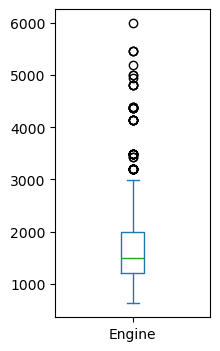

In [163]:
df['Engine'].plot.box(figsize=(2,4))

In Engine non troviamo valori estremi, o impossibili, ma solo valori molto alti (probabilmente auto di lusso). Quindi corretto lasciare così.

**10. `Power`**

Contiene la potenza dell'auto espressa in bhp.

*Gestione dei valori mancanti*


In [164]:
print(f"Valori mancanti: {df['Power'].isna().sum()}")

Valori mancanti: 0


Notiamo che non ha valori mancanti, mentre prima abbiamo visto che li aveva, molto probabilmente perché queste osservazioni coincidono con quelle eliminate in precedenza

*Correzzione di Inconsistenze e Formattazione*

Adesso verifichiamo se tutte le osservazioni sono conformi con la formattazione e condividono la stessa unità di misura:

In [165]:
df_power = df['Power']

# Controllo sulla formattazione
pattern = r'^\S+\s\S+$'

risultato_controllo = df_power.astype(str).str.match(pattern)

total_obs = len(df_power)
conformi = risultato_controllo.sum()
non_conformi = total_obs - conformi

print(f"Conformi: {conformi}")
print(f"Non conformi: {non_conformi}")

# Controllo sulle unità
power_units = df_power.str.split().str[-1]

print("\n---- Unità di misura presenti ----")
power_units.unique()

Conformi: 5789
Non conformi: 0

---- Unità di misura presenti ----


array(['bhp'], dtype=object)

In [166]:
pattern_numerico = r'.*\d+.*'

# 1. Identifica le stringhe che NON contengono un numero
# Il .astype(str) è importante per catturare tutti i tipi di stringa
non_numeriche_mask = ~df['Power'].astype(str).str.contains(pattern_numerico, na=False)

# 2. Converti le stringhe non numeriche identificate in NaN
df.loc[non_numeriche_mask, 'Power'] = np.nan

print(f"Smascherati {non_numeriche_mask.sum()} valori senza numeri come NaN.")

Smascherati 74 valori senza numeri come NaN.


In [167]:
df = df[~df['Power'].isna()].reset_index(drop=True)

print("Righe rimosse.")

Righe rimosse.


Perfetto sono tutte conformi, adesso possiamo procedere con l'estrarre il valore numerico:

In [168]:
df['Power'] = df['Power'].str.split(' ').str[0]
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

df['Power'] = df['Power'].astype('float64')

print("Valori estratti.")

Valori estratti.


*Gestione degli outliers*

Stampiamo il boxplot:

<Axes: >

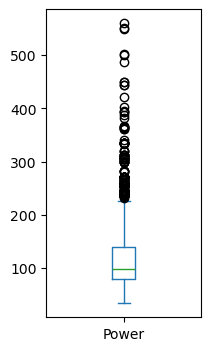

In [169]:
df['Power'].plot.box(figsize=(2,4))

In Power non troviamo valori estremi, o impossibili, ma solo valori molto alti (probabilmente auto di lusso). Quindi corretto lasciare così. Stesso discorso che valeva anche per Engine.

**11. `Seats`**

Contiene il numero di passeggeri che può ospitare l'auto.

*Gestione valori mancanti*

In [170]:
print(f"Valori mancanti: {df['Seats'].isna().sum()}")

Valori mancanti: 1


Mancano alcuni valori, vediamo quali valori assume questa variaibile. Ci aspetteremmo una predominanza di auto a 5 posti, che sono le più diffuse.

In [171]:
df['Seats'].value_counts()

Seats
5.0     4783
7.0      666
8.0      131
4.0       88
6.0       28
2.0       13
9.0        3
10.0       2
Name: count, dtype: int64

Visto che il valore che esce più spesso è 5, e dato che vogliamo tenere più dati possibili, abbiamo deciso di fare una cosa semplice: sostituire i valori mancanti nella colonna dei posti con un bel '5'.

Così facciamo un piccolo "errore" statistico, perché stiamo gonfiando un po' la categoria da 5 posti. Però è un ottimo compromesso tra l'essere precisi e l'avere un dataset completo. L'unica cosa che potremmo fare è rimuovere le classi 9 e 10, in quanto sono davvero poche.

Dato che i dati mancanti sono davvero pochi, questo piccolo trucchetto non rovinerà l'analisi generale né influenzerà seriamente il modello finale.

Procediamo all'imputazione e la rimozione:

In [172]:
df = df[df['Seats'] <= 8]
df = df.reset_index(drop=True)

In [173]:
mediana_seats = df['Seats'].median()
df['Seats'] = df['Seats'].fillna(mediana_seats)

print("Valori imputati.")

Valori imputati.


In [174]:
df['Seats'] = df['Seats'].astype(int)

*Gestione degli outlier*

Mostriamo il boxplot:

<Axes: >

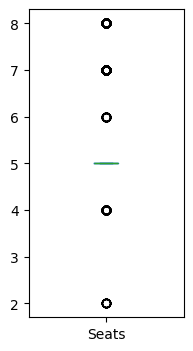

In [175]:
df['Seats'].plot.box(figsize=(2,4))

Abbiamo visto prima che più del 90% del dataset ha 5 posti. Probabilmente anche per questo motivo viene considerato outlier qualsiasi numero non sia 5. Lasciamo tutto così, dato che è tutto perfettamente plausibile.

**12. `New Price`**

Questa variabile contiene il valore del prezzo del nuovo modello di quell'auto, espresso in Lakh

*Gestione dei valori mancanti*

In [176]:
print(f"Valori mancanti: {df['New_Price'].isna().sum()}")

Valori mancanti: 4901


Questa colonna ha quasi tutti i valori mancanti. La sua gestione è molto problematica perché un imputazione risulta difficile perché non abbiamo abbastanza informazioni.

Quindi abbiamo deciso di rumuoverla per una questioni logistiche.

In [177]:
df.drop('New_Price', axis=1, inplace=True)

print("Colonna rimossa.")

Colonna rimossa.


**13. `Price`**

Questa variabile contiene il prezzo con cui è stata venduta l'auto.

Come visto prima questa variabile non ha alcun valore mancante.

Non c'è alcun controllo di formattazione o inconsistenza da fare per questa variabile. Essa è già pulita.

*Gestione degli outliers*

Vediamo il boxplot:

<Axes: >

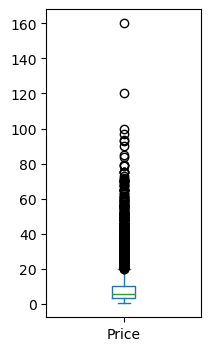

In [178]:
df['Price'].plot.box(figsize=(2,4))

Innanzitutto notiamo una distribuzione altamente asimmetrica, per la precisione right-skewed (se plottassimo la distribuzione). Converrebbe fare una trasformazione logaritmica per portare la sua ditribuzione ad assomigliare a quella normale (Gaussiana), per migliorare le performance del notro modello.

Vediamo che presenta molti valori alti, potrebbero riferirsi ad auto molto costose come auto di lusso, ma vediamo meglio:

In [179]:
df[df['Price'] > 100]

,Brand,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Category
3864,Land,Hyderabad,2,25000.0,Diesel,Automatic,First,13,2993,255.0,5,160.0,Luxury
5490,Lamborghini,Delhi,8,6500.0,Petrol,Automatic,Third,6,5204,560.0,2,120.0,Luxury


Infatti stimo parlando di auto di lusso, che sono molto costose. Non si trattano di outliers, non sono errori di prezzo. Tuttavia essendo che la nostra analisi include anche questo tipo di auto, abbiamo deciso di non rimuovere queste osservazioni.

Facciamo un controllo mirato per valori impossibili:

In [180]:
df[df['Price'] < 0.5]

,Brand,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Category
1622,Tata,Pune,8,65000.0,Petrol,Manual,Second,26,624,35.0,4,0.44,Mass-Market
2691,Hyundai,Pune,14,86000.0,Petrol,Manual,Second,15,1341,83.0,5,0.45,Mass-Market


Non abbiamo alcun valore zero (sarebbero senza dubbio outlier), ma queste auto non sono outlier.

> Abbiamo finito il nostro processo di Data Cleaning & Preparation, ne risulta un dataset più pulito e pronto per un analisi più approfondita.

In questo momento il dataset si presenta in questo modo:

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5709 entries, 0 to 5708
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5709 non-null   object 
 1   Location           5709 non-null   object 
 2   Age                5709 non-null   int64  
 3   Kilometers_Driven  5709 non-null   float64
 4   Fuel_Type          5709 non-null   object 
 5   Transmission       5709 non-null   object 
 6   Owner_Type         5709 non-null   object 
 7   Mileage            5709 non-null   int64  
 8   Engine             5709 non-null   int64  
 9   Power              5709 non-null   float64
 10  Seats              5709 non-null   int64  
 11  Price              5709 non-null   float64
 12  Brand_Category     5709 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 579.9+ KB


---

## 1.3 Analisi Esplorativa

Questa parte si concentra su uno studio più approfondito delle caratteristiche delle nostre osservazioni e sulle loro possibili correlazioni.

Si divide in due parti:
- **Analisi Univariata**, in cui calcoleremo le varie statistiche sommarie per una variabile alla volta
- **Analisi Multivariata**, in cui andremo ad esplorare le varie correlazioni provando a spiegare eventuali scoperte

### 1.3.1 Analisi Univariata

Come detto prima ci concentreremo su una variabile alla volta, seguendo un po' lo schema utilizzato per la parte precedente.

**1. `Brand`**

Andiamoli a visualizzare:

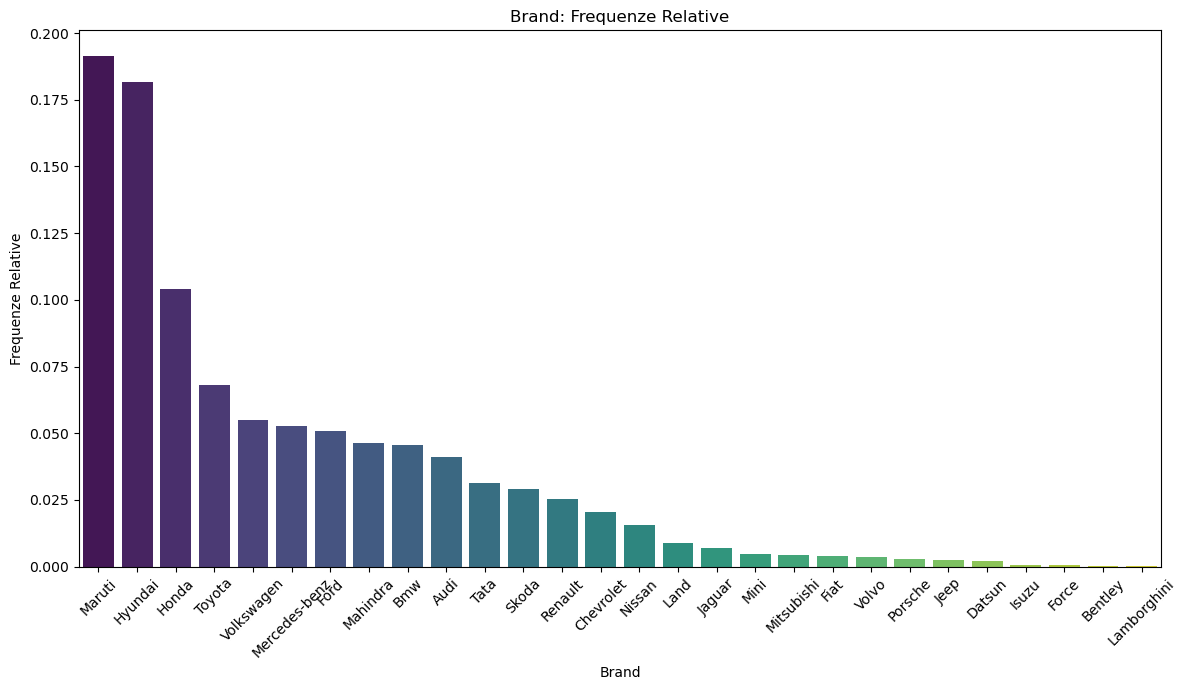

In [182]:
plt.figure(figsize=(12, 7))

brands = df['Brand'].value_counts(normalize=True)
ax = sns.barplot(x=brands.index, y=brands.values, hue=brands.index, palette='viridis', legend=False)

plt.title('Brand: Frequenze Relative')
plt.xticks(rotation=45)
plt.ylabel('Frequenze Relative')

plt.tight_layout()
plt.show()

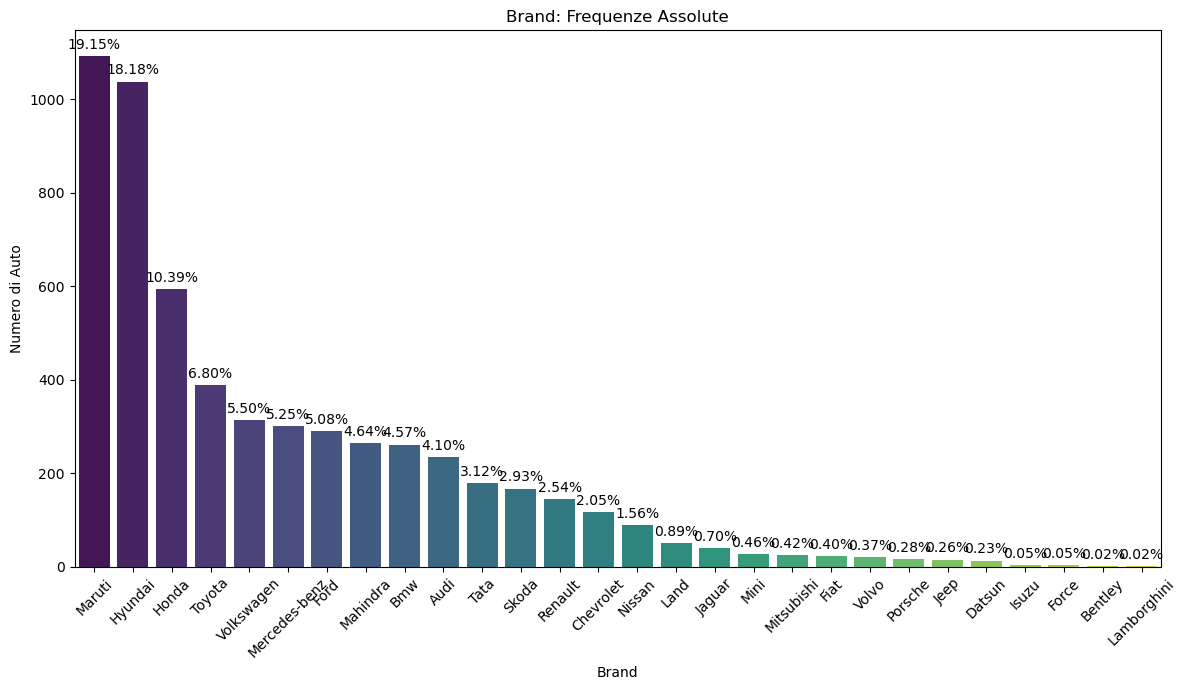

In [183]:
count_assoluto = df['Brand'].value_counts()
count_relativo = (df['Brand'].value_counts(normalize=True) * 100).loc[count_assoluto.index] 

plt.figure(figsize=(12, 7))

ax = sns.barplot(x=count_assoluto.index, y=count_assoluto.values, hue=count_assoluto.index, palette='viridis', legend=False)

for i, container in enumerate(ax.containers):
    percentuale = count_relativo.iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)

plt.title('Brand: Frequenze Assolute')
plt.xticks(rotation=45)
plt.ylabel('Numero di Auto')
plt.xlabel('Brand')

plt.tight_layout()
plt.show()

La distribuzione dei brand è fortemente sbilanciata verso Maruti e Hyundai (37% del totale). Questo sbilanciamento potrebbe creare problemi, inoltre notiamo che la nostra idea iniziale di combinare le auto in Other e Other Luxury, ha dato una mano.

**2. `Location`**

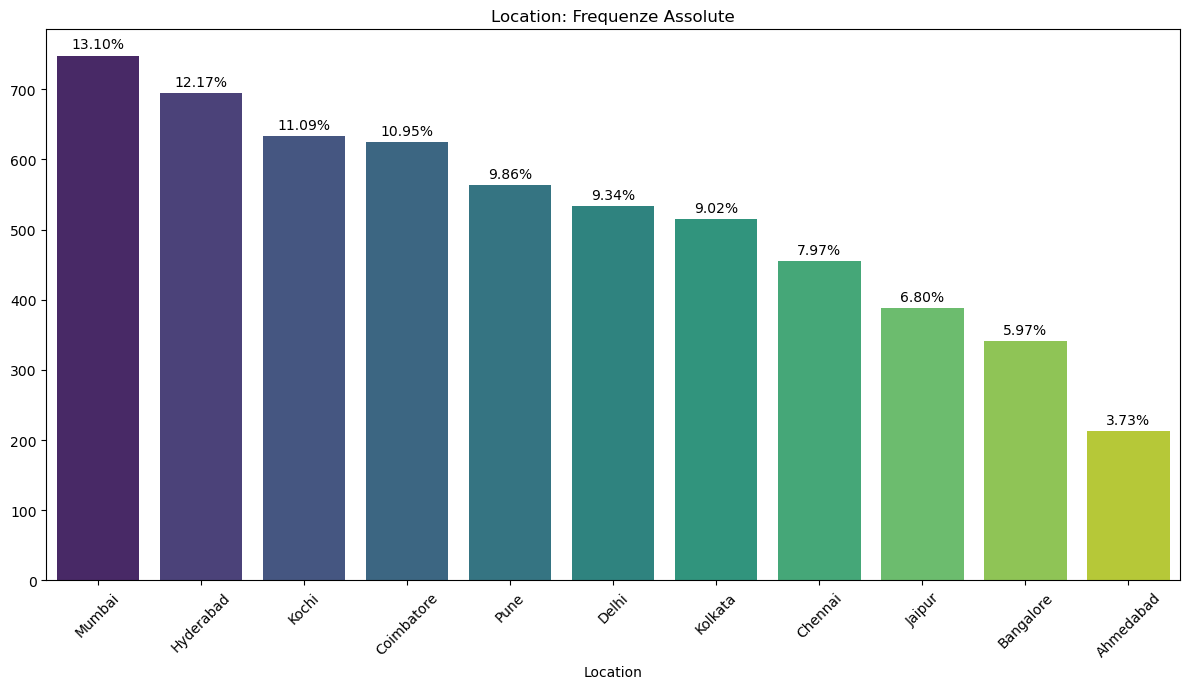

In [184]:
count_assoluto = df['Location'].value_counts()
count_relativo = (df['Location'].value_counts(normalize=True) * 100).loc[count_assoluto.index] 

plt.figure(figsize=(12, 7))

ax = sns.barplot(x=count_assoluto.index, y=count_assoluto.values, hue=count_assoluto.index, palette='viridis', legend=False)

for i, container in enumerate(ax.containers):
    percentuale = count_relativo.iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)

plt.title('Location: Frequenze Assolute')
plt.xticks(rotation=45)
plt.xlabel('Location')

plt.tight_layout()
plt.show()

Questa variabile va bene così, è abbastanza bilanciata, e a differenza di prima tra le classi c'è una discesa più graduale. Anche qui bisognerà renderle dummy.

**3. `Age`**

Andiamo le sue misure di tendenza centrale e di dispersione:

In [185]:
col = df['Age']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5709.000000
mean        5.398844
std         2.963774
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        14.000000
Name: Age, dtype: float64

mode:  0    5
Name: Age, dtype: int64

Skewness: 0.55
Kurtosis: -0.14


Notiamo varie cose:
- il **50% dei valori** ha tra i 3-7 anni
- **media**: 5.4, **mediana**: 5. Vuol dire che abbiamo dei valori che 'spingono' la media verso destra
- dalla **skewness** (asimmetria) notiamo che è assimetrica verso destra, come notato prima
- **kurtosis** ci indica che ha il picco un po' più schiacciato rispetto alla normale (gaussiana)

Vediamo la sua distribuzione:

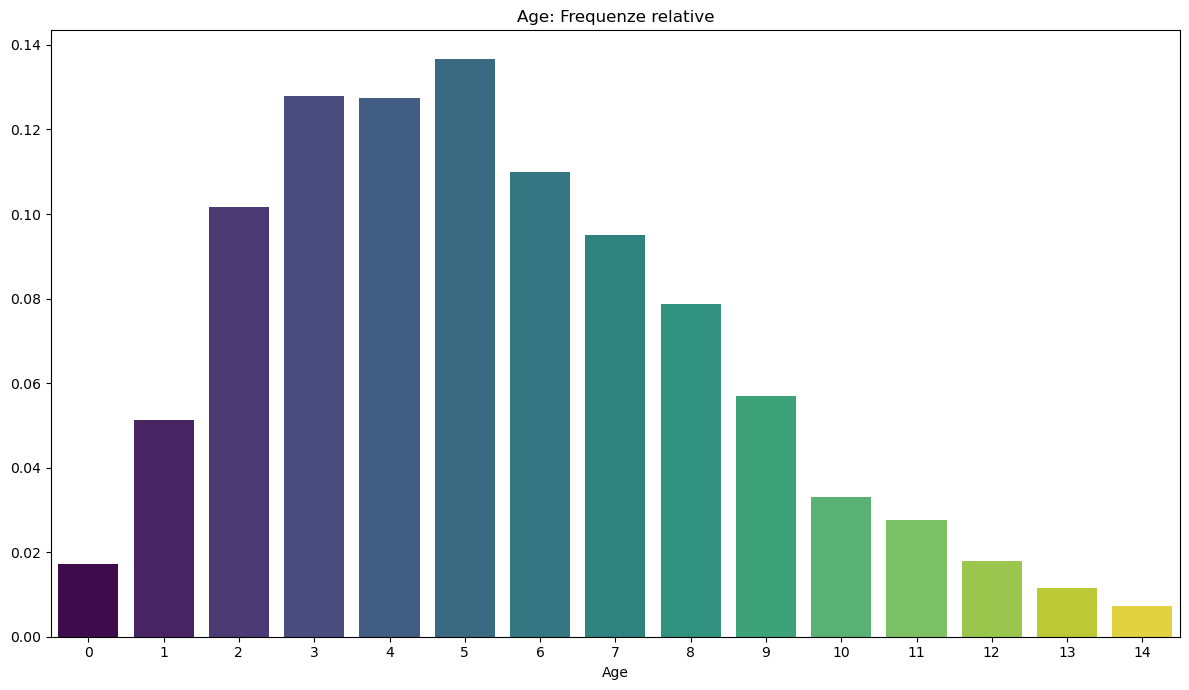

In [186]:
count = df['Age'].value_counts(normalize=True)

plt.figure(figsize=(12, 7))

sns.barplot(x=count.index, y=count.values, hue=count.index, palette='viridis', legend=False)

plt.title('Age: Frequenze relative')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Tende ad una distribuzione normale, ci piace.

**4. `Kilometers_Driven`**

In [187]:
col = df['Kilometers_Driven']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count      5709.000000
mean      56055.869329
std       32017.748047
min         171.000000
25%       33000.000000
50%       52000.000000
75%       72000.000000
max      170000.000000
Name: Kilometers_Driven, dtype: float64

mode:  0    60000.0
Name: Kilometers_Driven, dtype: float64

Skewness: 1.04
Kurtosis: 1.55


Notiamo varie cose:
- il **50% dei valori** si trova tra 33-72 mila km
- **media**: 56 mila km, **mediana**: 54 mila km. Vuol dire che abbiamo dei valori che 'spingono' la media verso destra, ma non si discosta di così tanto
- dalla **skewness** (asimmetria) notiamo che è assimetrica verso destra, come notato prima
- **kurtosis** ci indica che ha un picco' più alto rispetto alla normale (gaussiana)

Andiamo a vedere la sua distribuzione:

Num. of bins: 35


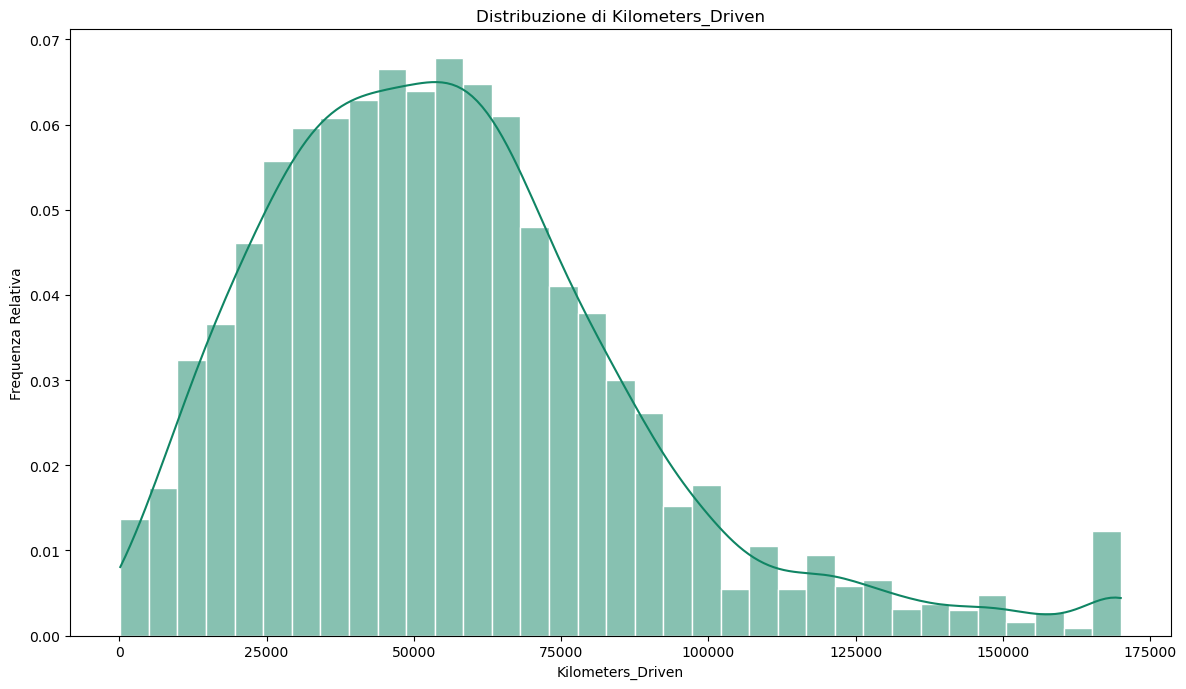

In [188]:
col = df['Kilometers_Driven']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 7))


ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#108564",
    edgecolor='white'
)
plt.title(f'Distribuzione di Kilometers_Driven')
plt.ylabel('Frequenza Relativa')
plt.xlabel('Kilometers_Driven')

plt.tight_layout()
plt.show()

Potremmo dover applicare una trasformazione logaritmica, in quanto è un po' asimmetrica.

**5. `Fuel_Type`**

Ricordiamo che Fuel_Type conteneva 5 tipi di etichette
- Diesel
- Petrol
- CNG
- LPG
- Electric

Le utlime tre componevano <1% del dataset, perciò avevamo deciso di ruomere quelle osservazioni.

Andremo quindi a mostrare uno stacked bar plot per mostrare le frequenze di questa variabile:

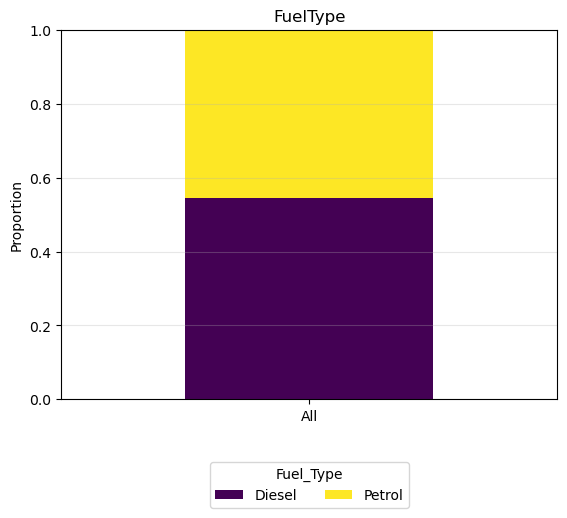

In [189]:
fuel_props = df.groupby(lambda _: 'All')['Fuel_Type'].value_counts(normalize=True).unstack()

fuel_props.plot(kind='bar', stacked=True, colormap='viridis')


plt.title('FuelType')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title='Fuel_Type', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(axis='y', alpha=0.3)

plt.show()

Notiamo che le proporzioni sono equilibrate, con una piccola predomiananza di auto a Diesel. Da trasformare in variabile binaria

**6. `Transmission`**

Vediamo la sua distribuzione:

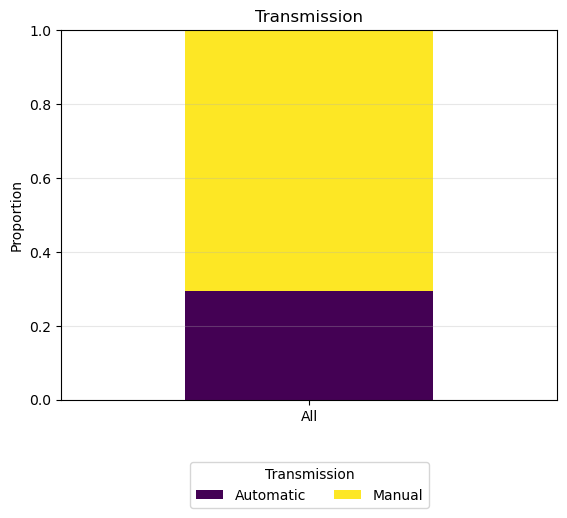

In [190]:
trans_props = df.groupby(lambda _: 'All')['Transmission'].value_counts(normalize=True).unstack()


trans_props.plot(kind='bar', stacked=True, colormap='viridis')

# Customize plot
plt.title('Transmission')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(title='Transmission', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(axis='y', alpha=0.3)

plt.show()

C'è una predominanza di auto Manuali. Qui dovremo trasformarla in una semplice variabile binaria. 

**7. `Owner_Type`**

Distribuzione Owner Type:
  Proprietari  Frequenza  Percentuale (%)
0       First       4738        82.991767
1      Second        878        15.379226
2       Third         93         1.629007
------------------------------


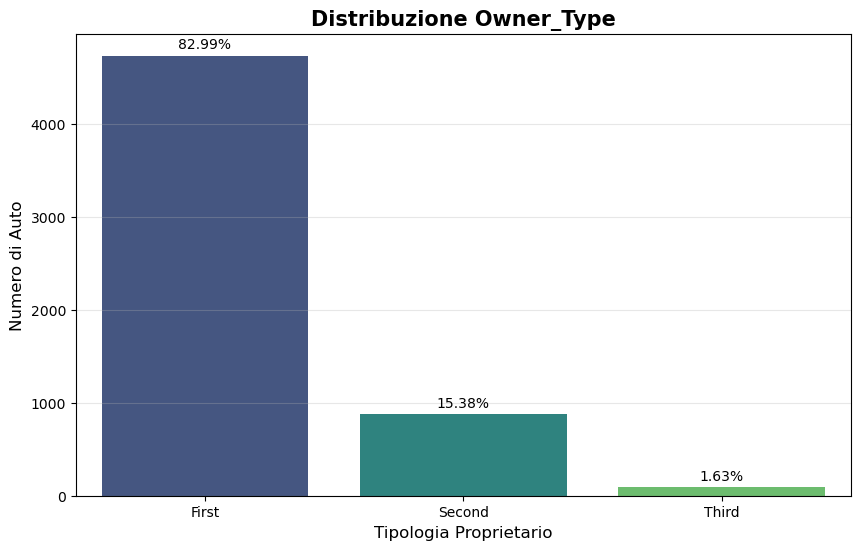

In [191]:
owner_counts = df['Owner_Type'].value_counts().reset_index()
owner_counts.columns = ['Proprietari', 'Frequenza']
owner_counts['Percentuale (%)'] = (owner_counts['Frequenza'] / len(df)) * 100

print("Distribuzione Owner Type:")
print(owner_counts)
print("-" * 30)

plt.figure(figsize=(10, 6))

order = owner_counts['Proprietari'] 

ax = sns.barplot(
    x='Proprietari', 
    y='Frequenza', 
    hue='Proprietari',
    data=owner_counts, 
    order=order,
    palette='viridis',
    legend=False
)

for i, container in enumerate(ax.containers):
    percentuale = owner_counts['Percentuale (%)'].iloc[i] 
    
    ax.bar_label(container, labels=[f'{percentuale:.2f}%'], padding=3, fontsize=10)


plt.title('Distribuzione Owner_Type', fontsize=15, fontweight='bold')
plt.xlabel('Tipologia Proprietario', fontsize=12)
plt.ylabel('Numero di Auto', fontsize=12)

plt.grid(axis='y', alpha=0.3)
plt.show()

Qui abbiamo un problema di sbilanciamento tra le classi. Un idea che potremmo applicare, è trasformare queste classi, in una scala ordinale. In modo tale che il modello, nonostante abbia pochi dati di una classe, comunque sa che 3 > 1. Questo ci aiuta matematicamente per risolvere questo problema.

**8. `Mileage`**

Andiamo le sue misure di tendenza centrale e di dispersione:

In [192]:
col = df['Mileage']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5709.000000
mean       17.901209
std         4.129523
min         6.000000
25%        15.000000
50%        18.000000
75%        21.000000
max        28.000000
Name: Mileage, dtype: float64

mode:  0    18
Name: Mileage, dtype: int64

Skewness: 0.13
Kurtosis: -0.46


- La deviazione standard di 3.79 indica che il campione è eterogeneo. La performance di un'auto tipica si discosta dalla media per circa 3.8 km/kg.

- Dal valore della skewness notiamo che tende ad una normale. Inoltre il valore di kurtosis ci indica che abbiamo un picco più appuntito e code più pesanti rispetto alla normale.


Num. of bins: 35


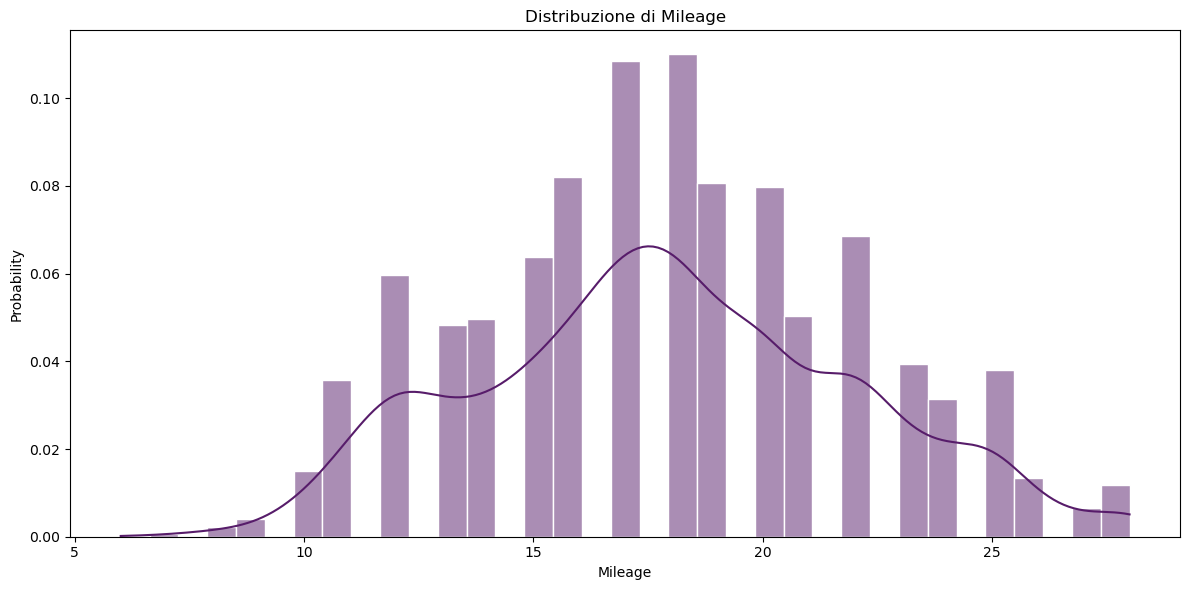

In [193]:
col = df['Mileage']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#571c6a",
    edgecolor='white'
)
plt.title(f'Distribuzione di Mileage')
plt.xlabel('Mileage')

plt.tight_layout()
plt.show()

Va bene così questa variabile. Bisognerà fare scaling come in altre variabilli.

**9. `Engine`**

In [194]:
col = df['Engine']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5709.000000
mean     1629.999299
std       598.594986
min       624.000000
25%      1198.000000
50%      1497.000000
75%      1991.000000
max      5998.000000
Name: Engine, dtype: float64

mode:  0    1197
Name: Engine, dtype: int64

Skewness: 1.43
Kurtosis: 3.24


Innanzitutto il 50% dei motori ha tra 1200 e 1984 CC di cilindrata. C'è molta varianza nei dati, essendo che la media è più grande della mediana ma non di molto significa che abbiamo alcuni valori maggiori. Ma abbiamo anche valori molto grandi, probabilmente auto sportive che hanno motori più potenti.

La Skewness ci indica che c'è una significativa asimmetria verso destra, potrebbe indicare che la maggior parte delle vendite riguardano auto economiche, utilitarie quindi con bassi CC; mentre Kurtosis ci mostra che la distribuzione è più appuntita rispetto la normale.

Num. of bins: 35


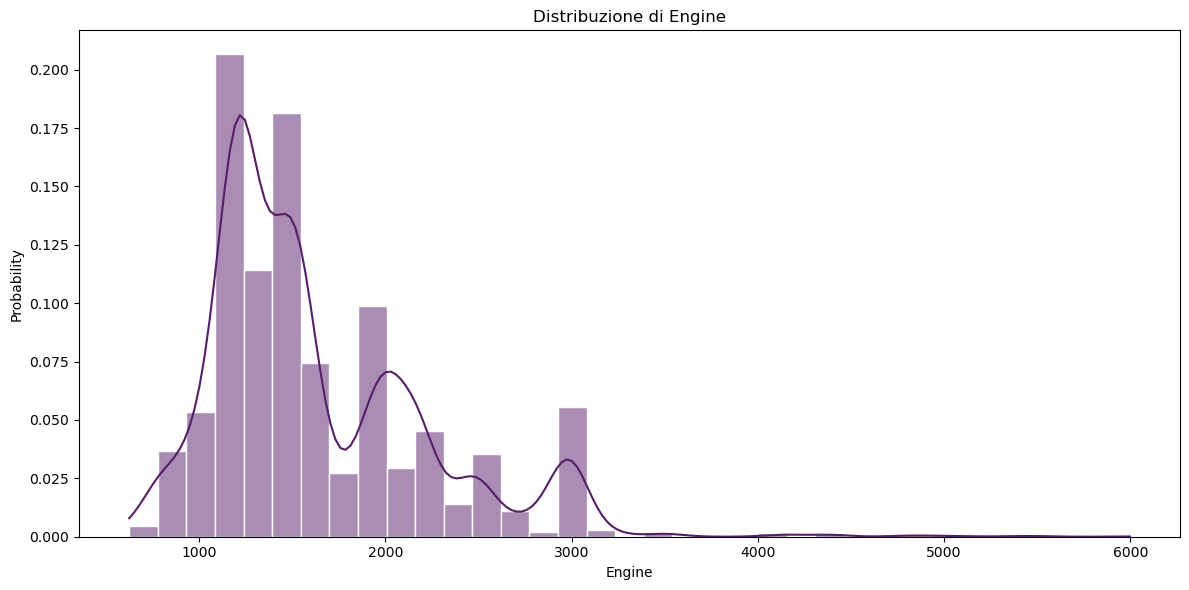

In [195]:
col = df['Engine']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#571c6a",
    edgecolor='white'
)
plt.title(f'Distribuzione di Engine')
plt.xlabel('Engine')

plt.tight_layout()
plt.show()

Essendo asimmetrica, dovremmo effettuare delle trasformazioni pure qui. 

**10. `Power`**

Andiamo le sue misure di tendenza centrale e di dispersione:

In [196]:
col = df['Power']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5709.000000
mean      114.044235
std        53.854747
min        34.200000
25%        78.900000
50%        98.600000
75%       140.000000
max       560.000000
Name: Power, dtype: float64

mode:  0    74.0
Name: Power, dtype: float64

Skewness: 1.93
Kurtosis: 6.62


Notiamo che il 50% delle osservazioni ha tra i 78 e i 138 cavalli, ma il massimo di discosta di molto, sempre per gli stessi motivi elencati per Engine.

Ci aspettiamo che Power abbia una distribuzione simile a Engine.

Num. of bins: 35


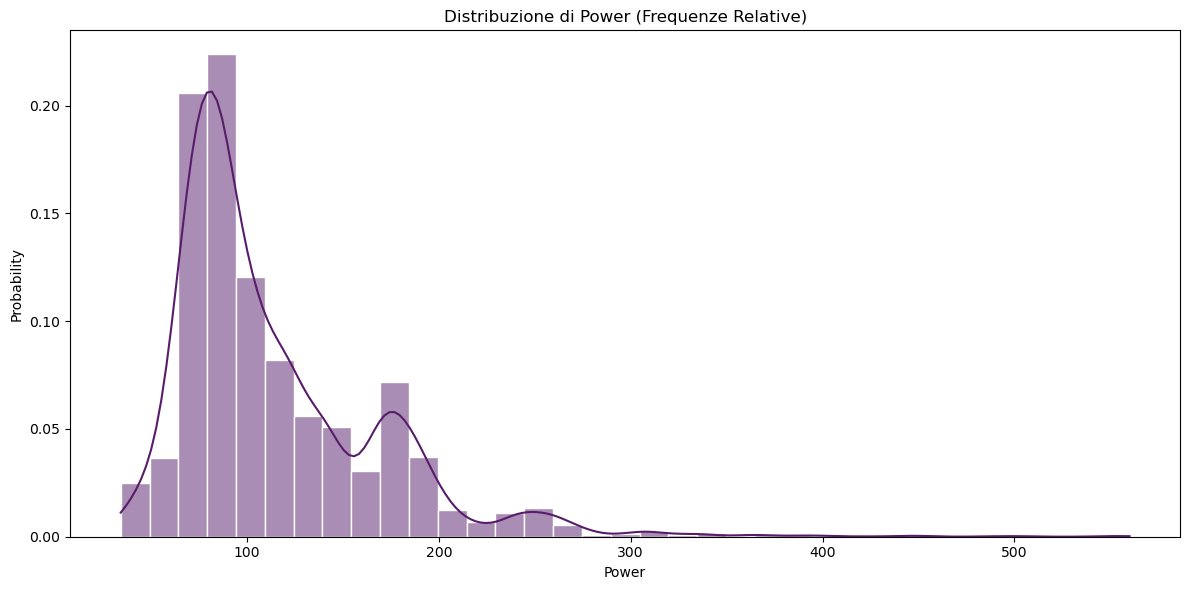

In [197]:
col = df['Power']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#571c6a",
    edgecolor='white'
)
plt.title(f'Distribuzione di Power (Frequenze Relative)')
plt.xlabel('Power')

plt.tight_layout()
plt.show()

Stesso discorso fatto per Engine. 

**11. `Seats`**

In [198]:
col = df['Seats']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5709.000000
mean        5.284813
std         0.795583
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         8.000000
Name: Seats, dtype: float64

mode:  0    5
Name: Seats, dtype: int64

Skewness: 1.82
Kurtosis: 3.42


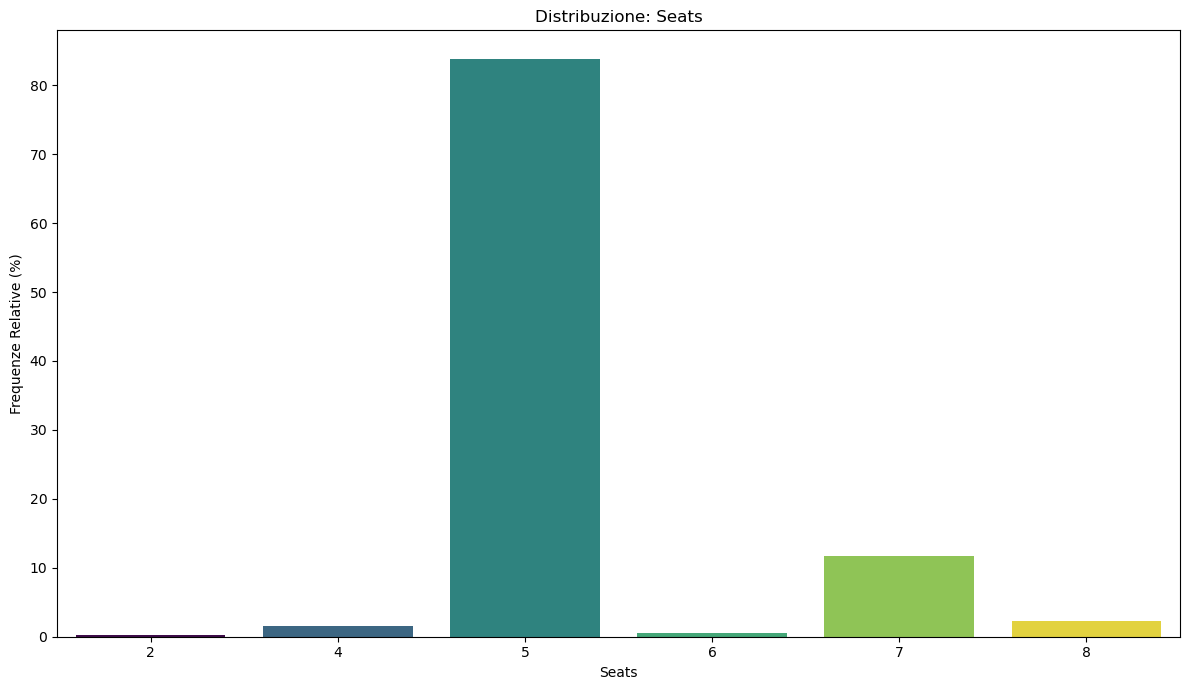

In [199]:
seats = df['Seats']

seats_abs = seats.value_counts().sort_index()
seats_rel = (seats.value_counts(normalize=True).sort_index()) * 100

plt.figure(figsize=(12, 7))


ax2 = sns.barplot(
    x=seats_rel.index, 
    y=seats_rel.values, 
    hue=seats_rel.index, 
    palette='viridis', 
    legend=False
)

plt.title('Distribuzione: Seats')
plt.xticks(rotation=0)
plt.ylabel('Frequenze Relative (%)')
plt.xlabel('Seats')

plt.tight_layout()
plt.show()


Qui abbiamo nuovamente classi sbilanciate, ma non è un problema se le lasciamo in numeri discreti, seguendo la stessa logica di Owner_Type e basandoci quindi su scala ordinale.

**12. `Price`**

Ricordiamo che il prezzo è espresso in Lahks, in cui 1 unità di Lahks equivale a 100.000. È comunemente usata per indicare cifre in Rupie indiane (INR) o pakistane (PKR). Ad esempio, "5 Lahks di Rupie" significa 500.000 Rupie.

In [200]:
col = df['Price']

print(col.describe())

print("")

print("mode: ", col.mode())

print("")

print(f"Skewness: {col.skew():.2f}")
print(f"Kurtosis: {col.kurtosis():.2f}")

count    5709.000000
mean        9.698599
std        11.240835
min         0.440000
25%         3.650000
50%         5.800000
75%        10.250000
max       160.000000
Name: Price, dtype: float64

mode:  0    4.5
Name: Price, dtype: float64

Skewness: 3.34
Kurtosis: 17.25


Num. of bins: 35


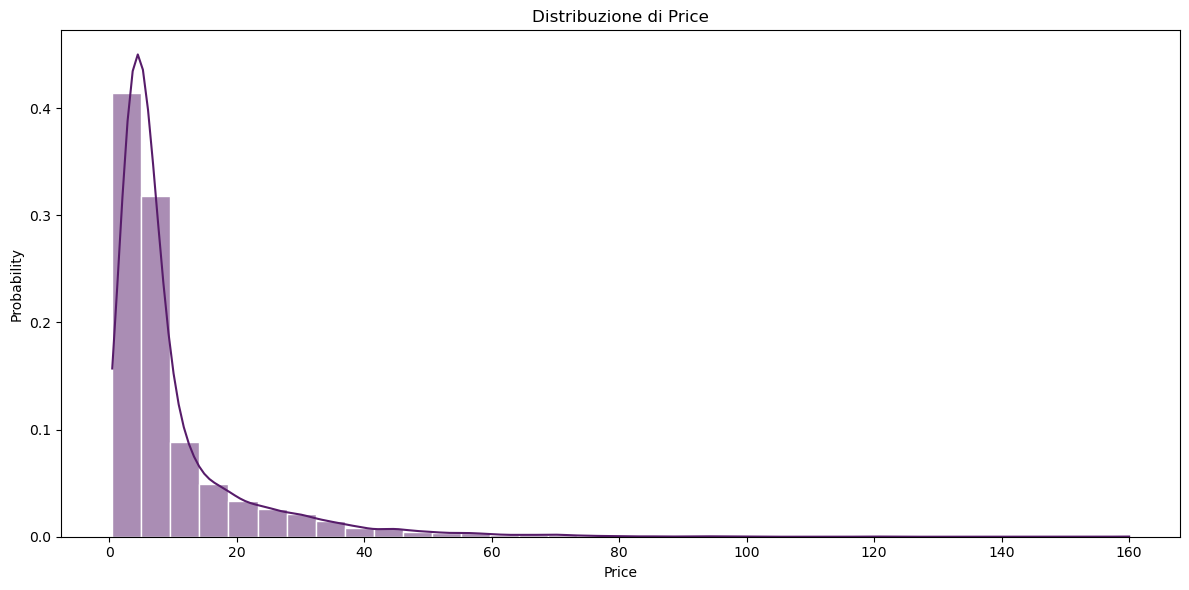

In [201]:
col = df['Price']

n = len(col)
rice_bins = int(2 * n**(1/3))

print(f"Num. of bins: {rice_bins}")

plt.figure(figsize=(12, 6))

ax = sns.histplot(
    x=col, 
    bins=rice_bins, 
    kde=True, 
    stat='probability',
    color="#571c6a",
    edgecolor='white'
)
plt.title(f'Distribuzione di Price')
plt.xlabel('Price')

plt.tight_layout()
plt.show()

Questa distribuzione è molto diversa dalla normale. Notiamo un alto picco e un'asimmetria molto accentuata. Deduciamo che le auto di lusso sono molto meno vendute delle utilitarie. La moda si aggira tra 0 e 5 Lahks, con oltre il 40% delle auto. 

Questa coda è causata da un gruppo di auto con prezzi molto, molto alti (auto di lusso, sportive, o veicoli specializzati).

Bisognerà fare necessariamente una trasformazione logaritmica.

### 1.3.2 Analisi Multivariata

Andiamo a vedere la matrice di correlazione tra le varie variabili:

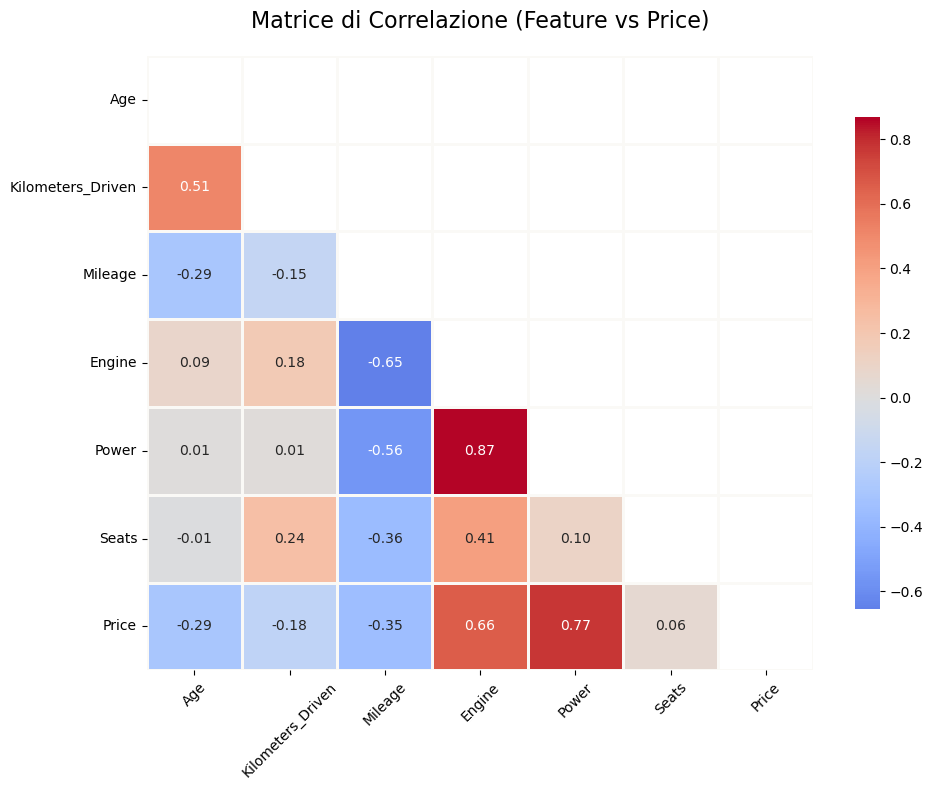

In [202]:
plt.figure(figsize=(10, 8))
numeric_cols = ['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
corr_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True,        
            fmt=".2f",         
            cmap='coolwarm',   
            center=0,          
            linewidths=1,      
            linecolor='#FAF9F6', 
            cbar_kws={"shrink": .8})

plt.title('Matrice di Correlazione (Feature vs Price)', fontsize=16, pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

(Power 0.77, Engine 0.66): Sono correlazioni fortissime. Significa che la potenza è il miglior predittore del prezzo. Se l'auto ha tanti cavalli, costa tanto.

L'Invecchiamento (Age -0.29): Correlazione negativa solida. Ogni anno che passa, il prezzo scende. Perfetto.

(Mileage -0.35): È negativo. Significa che più l'auto è efficiente (fa tanti km con un litro), meno costa. Perché? Perché le auto che consumano poco sono le utilitarie economiche (Maruti). Le auto che consumano molto sono le Ferrari e i SUV di lusso. Quindi ha senso.
  
**Multicollinearità**: (Engine vs Power = 0.87) Il quadratino rosso scuro tra Engine e Power. 0.87 è altissimo. Significa che queste due variabili dicono quasi la stessa cosa (motore grosso = tanta potenza).

Soluzione futura: Se il modello vacilla, potremmo doverne eliminare una delle due.

Andiamo adesso a visualizzare degli scatter plots, per vedere le distribuzioni delle varie coppie di variabili.

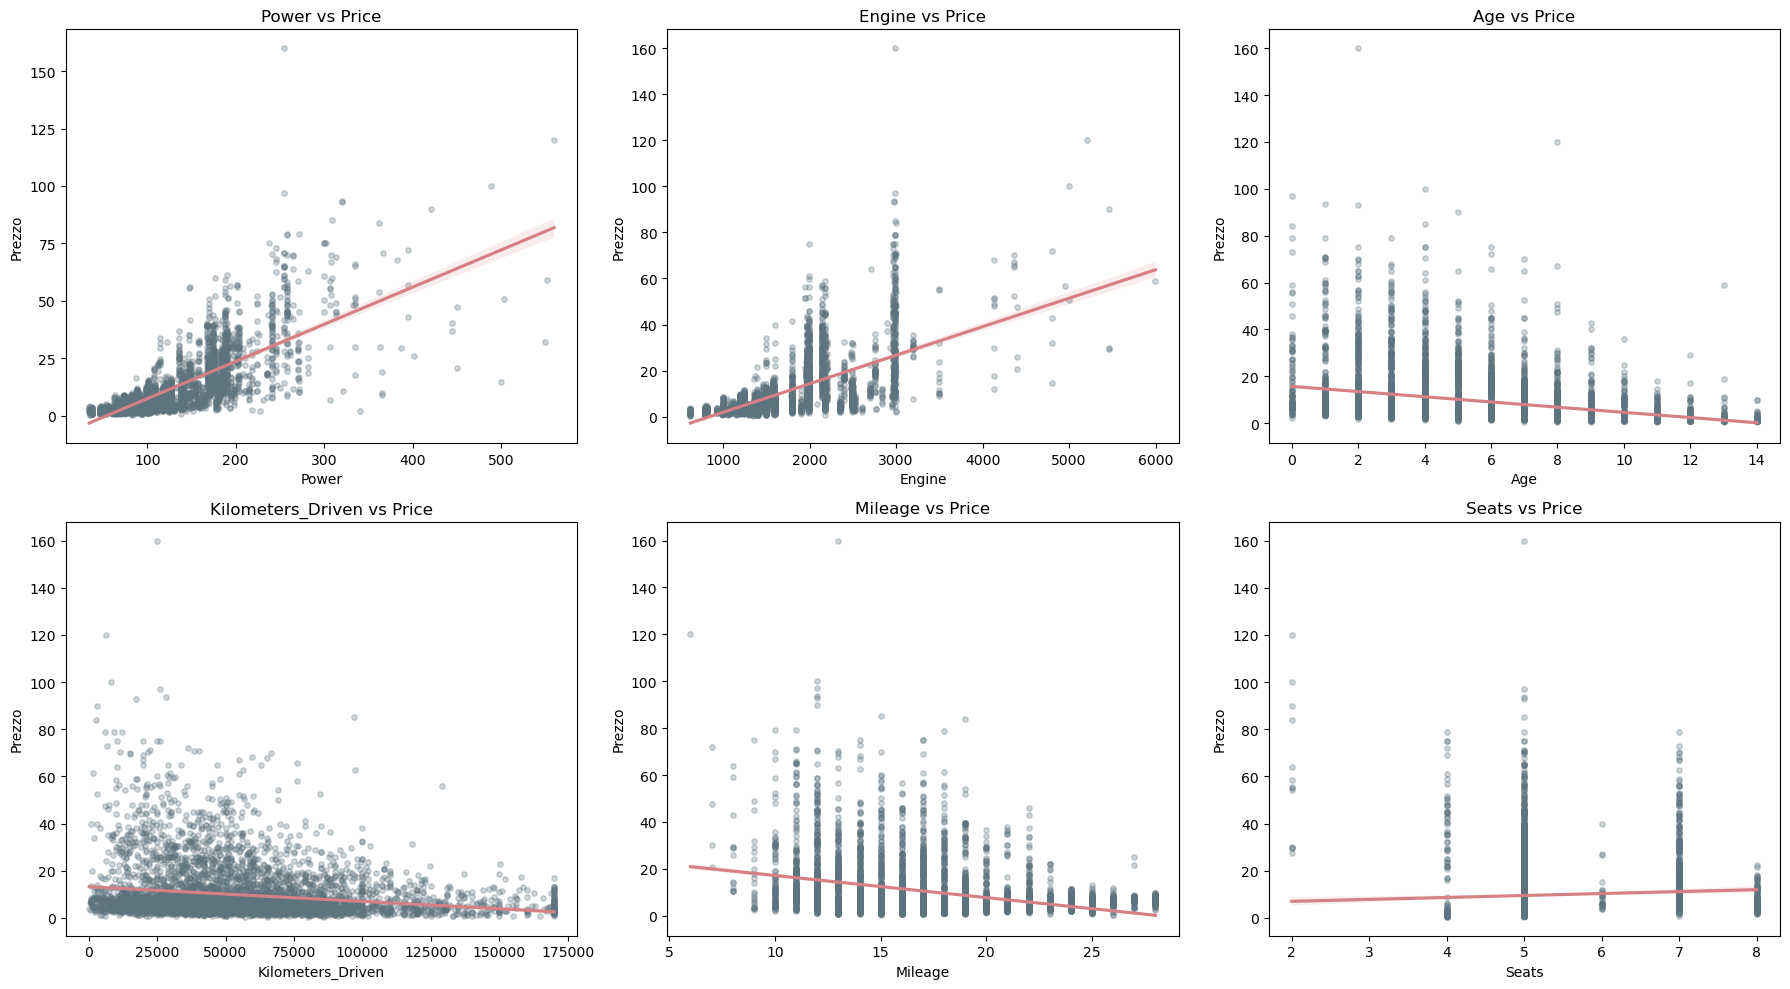

In [203]:
vars_to_plot = ['Power', 'Engine', 'Age', 'Kilometers_Driven', 'Mileage', 'Seats'] 

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes = axes.flatten()

for i, col in enumerate(vars_to_plot):
    sns.regplot(x=col, y='Price', data=df, ax=axes[i],
                scatter_kws={'color': '#5D737E', 'alpha': 0.3, 's': 15}, 
                line_kws={'color': '#D68086'}) 
    
    axes[i].set_title(f'{col} vs Price', fontsize=12)
    axes[i].set_ylabel('Prezzo')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

L'analisi visiva delle variabili grezze evidenzia relazioni significative col target, ma anche evidenti non-linearità (crescita esponenziale di Price con Power). Inoltre, variabili come i Kilometers presentano una distribuzione fortemente asimmetrica. Queste osservazioni giustificano la necessità di applicare trasformazioni logaritmiche (in particolare sul Target Price e su Kilometers_Driven) per linearizzare le relazioni e stabilizzare la varianza prima di procedere con la modellazione.

Andiamo a vedere come cambia Price in relazione alle varie variabili:

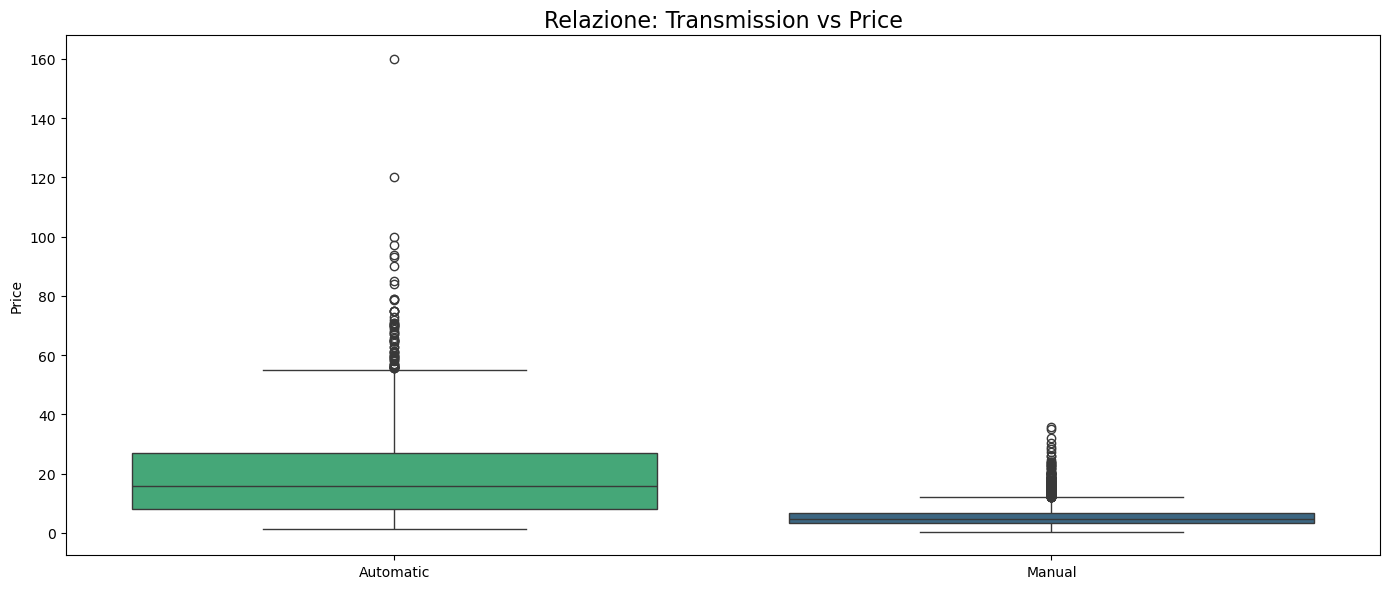

Statistiche per TRANSMISSION:
              count   mean  median    std
Transmission                             
Automatic      1672  19.86   16.00  15.99
Manual         4037   5.49    4.75   3.52


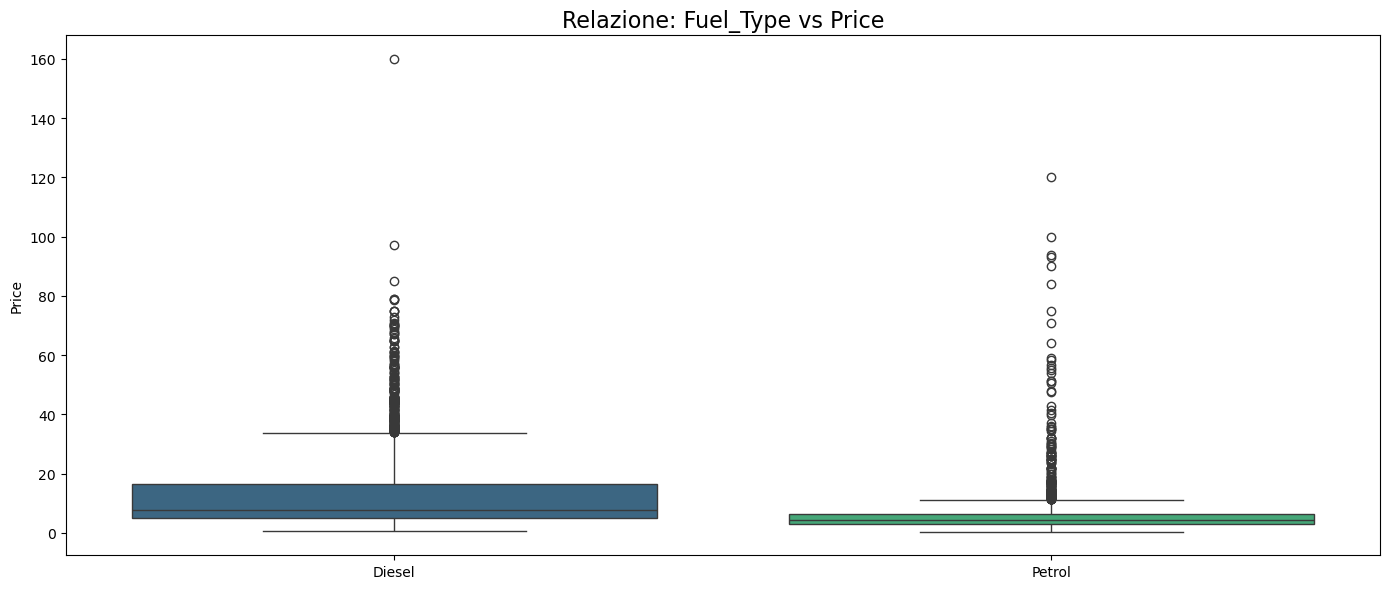

Statistiche per FUEL_TYPE:
           count   mean  median    std
Fuel_Type                             
Diesel      3116  12.89    7.83  12.79
Petrol      2593   5.86    4.25   7.40


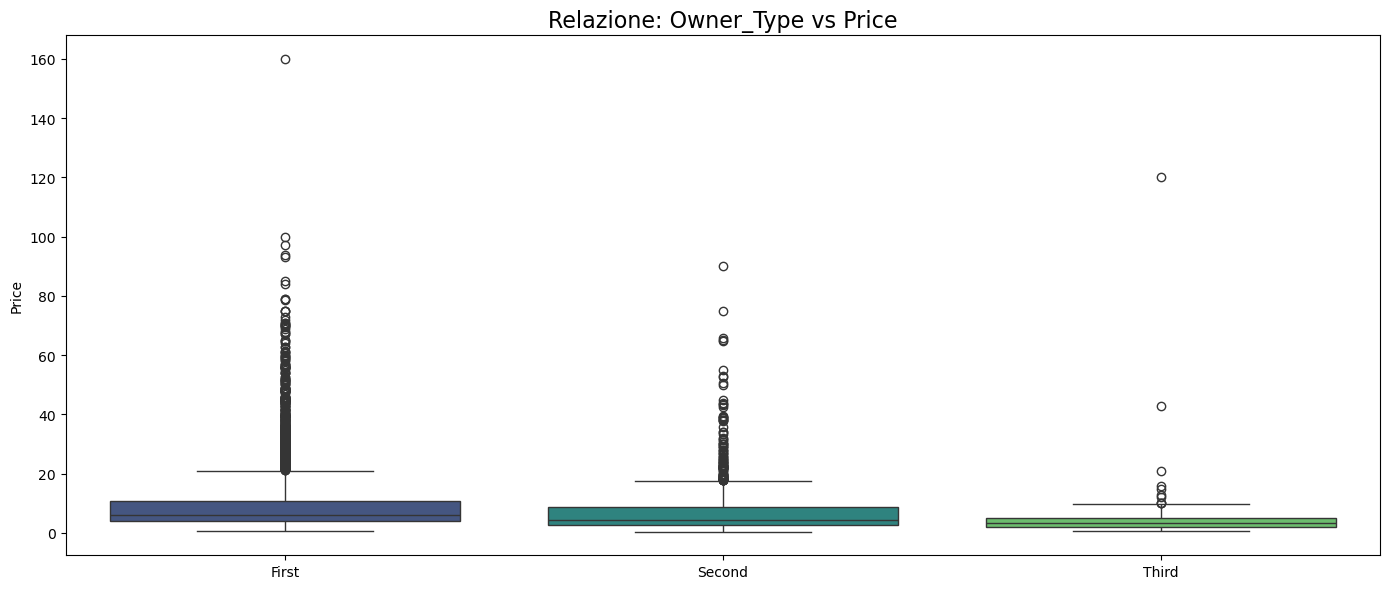

Statistiche per OWNER_TYPE:
            count   mean  median    std
Owner_Type                             
First        4738  10.10    6.00  11.43
Second        878   7.97    4.51   9.67
Third          93   5.80    3.25  13.11


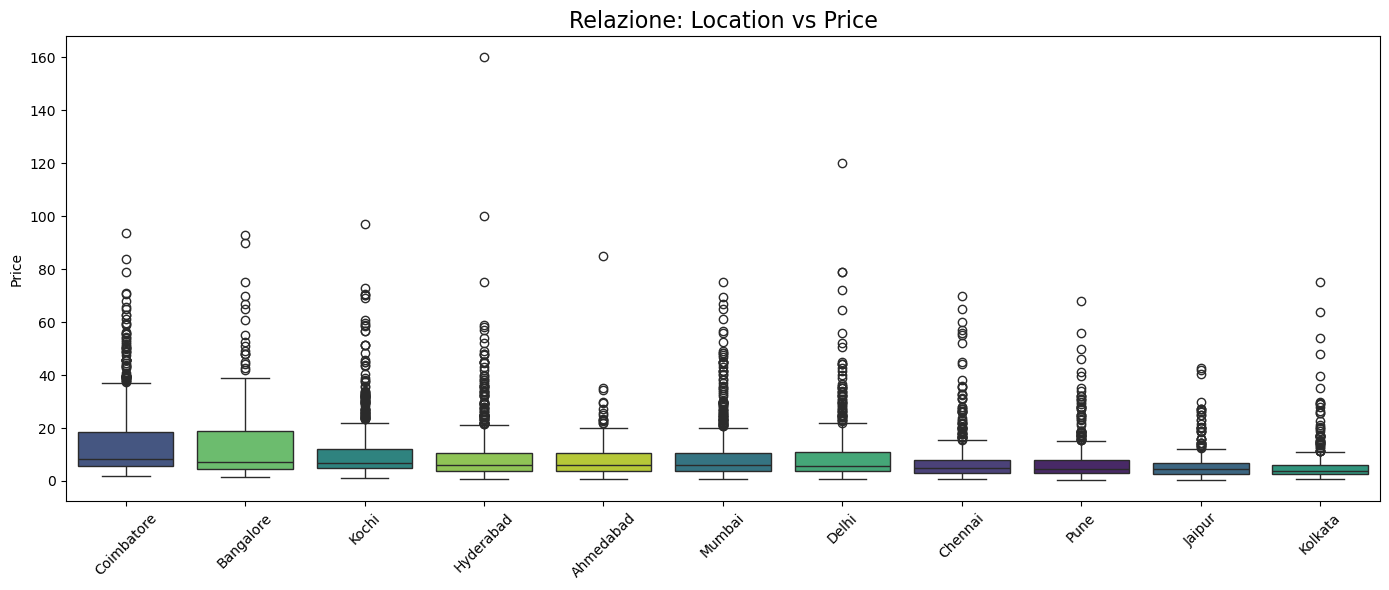

Statistiche per LOCATION:
            count   mean  median    std
Location                               
Coimbatore    625  15.02    8.34  14.82
Bangalore     341  13.55    7.20  14.36
Kochi         633  11.32    6.82  11.90
Hyderabad     695  10.10    6.00  12.19
Ahmedabad     213   8.47    6.00   8.28
Mumbai        748   9.60    5.93  10.23
Delhi         533   9.91    5.70  11.69
Chennai       455   8.02    4.80   9.58
Pune          563   7.03    4.50   7.61
Jaipur        388   6.07    4.35   5.94
Kolkata       515   5.73    3.75   6.97


In [204]:
cat_cols = ['Transmission', 'Fuel_Type', 'Owner_Type', 'Location']

for col in cat_cols:
    stat = df.groupby(col)['Price'].agg(['count', 'mean', 'median', 'std'])
    
    stat = stat.sort_values(by='median', ascending=False)
    
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=col, y='Price', data=df, order=stat.index, palette='viridis', hue=col)
    plt.title(f'Relazione: {col} vs Price', fontsize=16)
    plt.ylabel('Price')
    plt.xlabel('')
    
    if len(stat) > 5:
        plt.xticks(rotation=45)
        
    plt.tight_layout()
    plt.show()
    
    print(f"Statistiche per {col.upper()}:")
    print(stat.round(2))

Notiamo varie cose:
- auto 'Automatic' in media hanno un prezzo maggiore (2,77 Lakh) delle auto 'Manual' (1.74 Lakh)
- auto che fanno uso di 'Diesel' come carburante hanno un prezzo maggiore in media di quelle che fanno uso di 'Petrol' (2.32 vs 1.70 Lahk)
- auto che hanno avuto meno proprietari hanno un prezzo maggiore in media
- la `Location` non sembra influenzare significativamente il prezzo

Mettiamo a confronto `Transmission` con `Fuel_Type`:

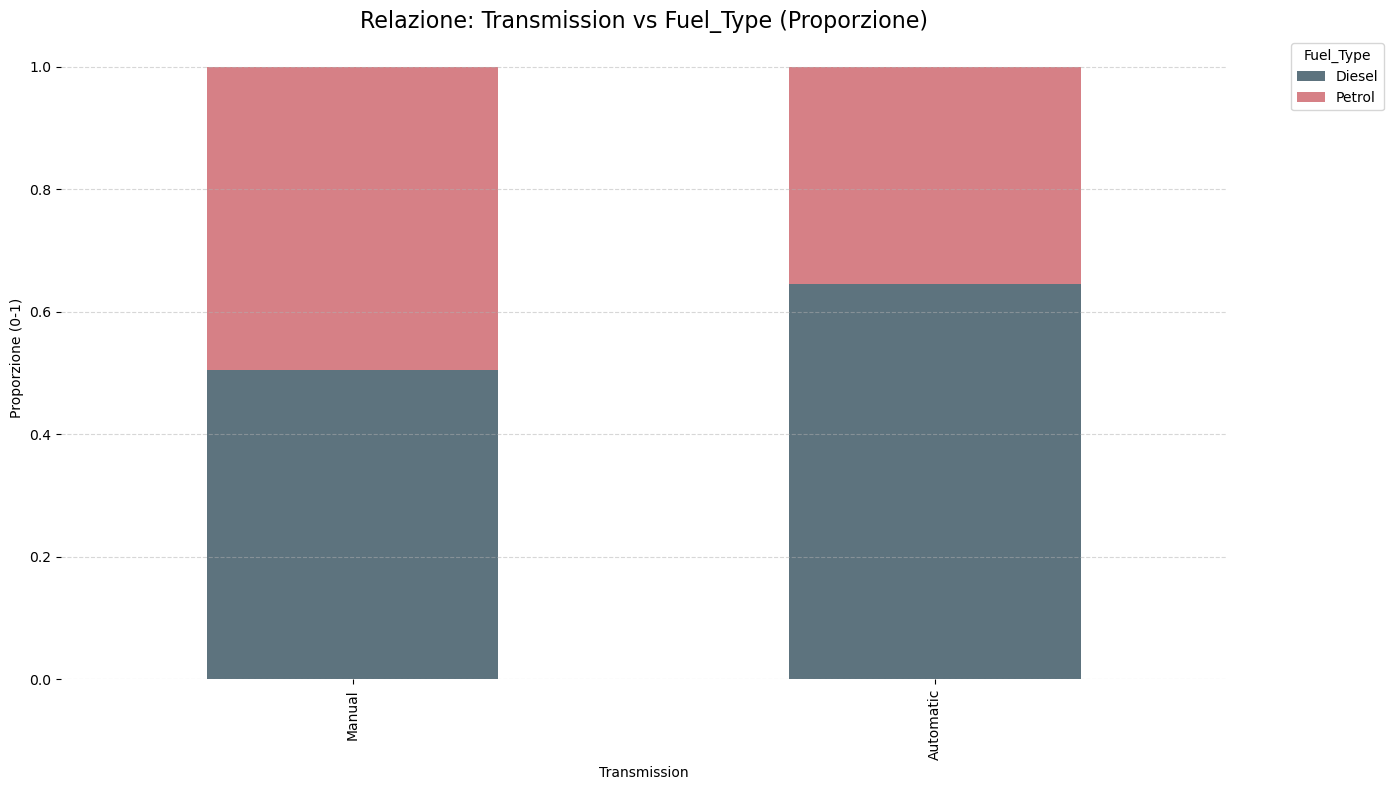

In [205]:
cat1 = 'Transmission'
cat2 = 'Fuel_Type'

cross_tab_prop = pd.crosstab(df[cat1], df[cat2], normalize='index')
cross_tab_prop = cross_tab_prop.sort_values(by='Diesel', ascending=True)

ax = cross_tab_prop.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#5D737E', '#D68086'])

plt.title(f'Relazione: {cat1} vs {cat2} (Proporzione)', fontsize=16)
plt.ylabel('Proporzione (0-1)')
plt.xlabel(cat1)
plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.box(False)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Sembra che le auto automatiche usino maggiormente il Diesel.

In [206]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [207]:
contingency_table = pd.crosstab(df['Transmission'], df['Fuel_Type'])

print("--- Tabella di Contingenza (Transmission vs Fuel_Type) ---")
print(contingency_table)
print("\n" + "="*50 + "\n")

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Statistica Chi-Quadro: {chi2:.2f}")
print(f"P-Value: {p:.4f}")

if p < 0.05:
    print("Risultato: Le variabili sono statisticamente DIPENDENTI (C'è relazione).")
else:
    print("Risultato: Le variabili sono INDIPENDENTI (Non c'è relazione).")

n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramer_v = np.sqrt(chi2 / (n * min_dim))

print(f"V di Cramér (Forza della relazione 0-1): {cramer_v:.3f}")

--- Tabella di Contingenza (Transmission vs Fuel_Type) ---
Fuel_Type     Diesel  Petrol
Transmission                
Automatic       1079     593
Manual          2037    2000


Statistica Chi-Quadro: 93.92
P-Value: 0.0000
Risultato: Le variabili sono statisticamente DIPENDENTI (C'è relazione).
V di Cramér (Forza della relazione 0-1): 0.128


C'è una relazione molto debole. Il modello ha bisogno di entrambe le colonne per capire il prezzo. 

Riassumiamo tutto quello che abbiamo scoperto in questa analisi:
- Vi è una correlazione molto positiva tra `Power` e `Price`
- Vi è una correlazione molto positiva tra `Engine` e `Price`
- Sia `Power` e sia `Engine` influenzano `Price` allo stesso modo (rischio multicollinearità);
- Vi è una correlazione negativa tra `Age` e `Price`, banalmente più l'auto invecchia e meno costa;
- Vi è una correlazione negativa tra `Mileage` e `Price`, motori più efficienti sono legati ad auto più economiche e non troppo potenti, auto costone sono molto potenti e consumano di più;
- Vi è una correlazione negativa tra `Owner_Type` e `Price`, un auto che ha avuto più proprietari potrebbe essere in condizioni peggiori oppure essere più vecchia;
- La `Location` non sembra influenzare più di tanto il prezzo;
- Sembra che auto più costose utilizzino il 'Diesel' invece del 'Petrol'.

Prima di andare alla prossima parte, dobbiamo però fare una trasformazione, per non sabotare le nostre analisi.

**Trasformazione**

L'applicazione della trasformazione $\log(Pric\text{e})$ è un passaggio fondamentale per preparare i dati alla modellazione di regressione per le seguenti ragioni:
- Normalizzazione della Distribuzione: La regressione lineare assume che i residui del modello siano distribuiti normalmente. Le variabili target fortemente asimmetriche, come il nostro Price, violano questa assunzione. La trasformazione logaritmica agisce per ridurre l'asimmetria, rendendo la distribuzione del prezzo (in scala logaritmica) molto più vicina alla normale.
- Gestione degli Outlier: La trasformazione riduce l'influenza degli outlier estremi (le auto di lusso a $120$ e $160$). Sulla scala logaritmica, la distanza tra $100$ e $160$ è molto minore che sulla scala originale, mitigando il loro impatto sul modello senza doverli eliminare.

In [208]:
df['Price'] = np.log1p(df['Price'])

---

## 1.4 Inferenza statistica

Adesso che conosciamo bene il nostro dataset, le nostre variabili e come essere sono correlate, possiamo applicare i principi dell'inferenza statistica.

**1. Transmission & Price**

Sembra che il tipo di cambio influenzi il prezzo.

Vediamo l'intervallo di confidenza:

In [209]:
from scipy import stats
from scipy.stats import normaltest
import statsmodels.api as sm

In [210]:
print(f"Gruppi di trasmissione: {df['Transmission'].unique()}\n")

group_per_transmission =  df.groupby('Transmission')['Price']
mean = group_per_transmission.mean()
std = group_per_transmission.std()

count = group_per_transmission.count()
std_err = std/np.sqrt(count)

confidence_level = 0.95

interval_manual = stats.norm.interval(confidence_level, loc=mean['Manual'], scale=std_err['Manual'])
interval_automatic = stats.norm.interval(confidence_level, loc=mean['Automatic'], scale=std_err['Automatic'])

print("---- Media per gruppo di tramissione ----")
print(f"Manual:\t\t {mean['Manual']:.2f}\nAutomatic:\t {mean['Automatic']:.2f}\n")

print("---- Std Dev per gruppo di tramissione ----")
print(f"Manual:\t\t {std['Manual']:.2f}\nAutomatic:\t {std['Automatic']:.2f}\n")

print("---- Std Err per gruppo di tramissione ----")
print(f"Manual:\t\t {std_err['Manual']:.2f}\nAutomatic:\t {std_err['Automatic']:.2f}\n")

print("---- Confidence Interval di price per gruppo di tramissione ----")
print(f"Manual:\t\t ({interval_manual[0]:.2f}, {interval_manual[1]:.2f})")
print(f"Automatic:\t ({interval_automatic[0]:.2f}, {interval_automatic[1]:.2f})\n")

Gruppi di trasmissione: ['Manual' 'Automatic']

---- Media per gruppo di tramissione ----
Manual:		 1.75
Automatic:	 2.77

---- Std Dev per gruppo di tramissione ----
Manual:		 0.48
Automatic:	 0.75

---- Std Err per gruppo di tramissione ----
Manual:		 0.01
Automatic:	 0.02

---- Confidence Interval di price per gruppo di tramissione ----
Manual:		 (1.74, 1.77)
Automatic:	 (2.73, 2.81)



Eseguiamo un Two Sample T-Test verificare l'affermazione vista in precedenza, ovvero se c'è una differenza significatica tra la media del prezzo delle auto Automatiche e quello delle Manuali.

In [211]:
manual = df[df['Transmission'] == 'Manual']['Price']
automatic = df[df['Transmission'] == 'Automatic']['Price']

t_stat, p_value = stats.ttest_ind(manual, automatic)

alpha = 0.05

print(f"Test statistic: {t_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

if p_value < alpha:
    print("Conclusione: c'è una differenza significativa tra la media del prezzo delle auto Automatiche e Manuali.")
else:
    print("Conclusione: non c'è una differenza significativa tra la media del prezzo delle auto Automatiche e Manuali.")

Test statistic: -61.50
Significance level: 0.05
P-value: 0.00
Conclusione: c'è una differenza significativa tra la media del prezzo delle auto Automatiche e Manuali.


**2. Price**

Sembra che Price adesso tenda ad una ditribuzione Gaussiana:

In [212]:
statistic, p_value = normaltest(df['Price'])

alpha = 0.05

print(f"Test statistic: {statistic:.2f}")
print(f"P-value: {p_value:.10f}")

if p_value > alpha:
    print("E' Gaussiano. L'ipotesi H0 è vera.")
else:
    print("H0 rifiutata")

Test statistic: 495.08
P-value: 0.0000000000
H0 rifiutata


Ma andiamo a vedere un Q-Q plot:

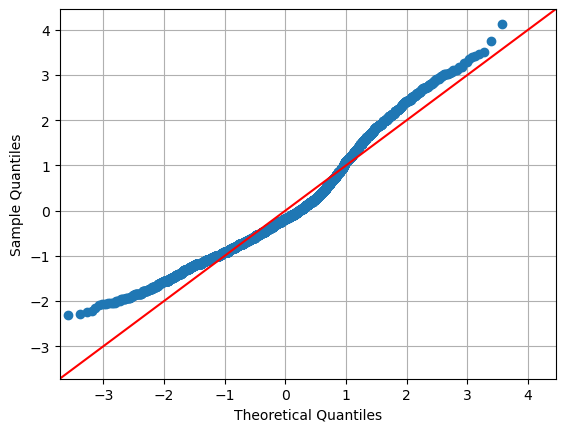

In [213]:
sm.qqplot(df['Price'], fit=True, line='45')
plt.grid()
plt.show()

Senza dubbio abbiamo avuto un netto miglioramto rispetto alla distribuzione prima della trasformazione. 
Il nostro modello ne trarrà vantaggio. 

**3. Automatic & Manual**

Abbiamo notato che nel nostro dataset le auto a cambio Manuale sono più di quelle automatiche, vediamo se è così pure nella nostra popolazione:

In [214]:
group_per_transmission =  df.groupby('Transmission')['Price']
count = group_per_transmission.count()

total = df['Transmission'].count()

confidence_level = 0.95

proportion = count['Manual'] / total
conf_interval_man = sm.stats.proportion_confint(count['Manual'], total, alpha=1-confidence_level, method='normal')
conf_interval_aut = sm.stats.proportion_confint(count['Automatic'], total, alpha=1-confidence_level, method='normal')

print(f"---- Sample Proportion ----")
print(f"Manual:\t\t {proportion:.2f}")
print(f"Automatic:\t {1 - proportion:.2f}\n")

print("---- Confidence Interval of Proportion ----")
print(f"Manual:\t\t ({conf_interval_man[0]:.2f}, {conf_interval_man[1]:.2f})")
print(f"Automatic:\t ({conf_interval_aut[0]:.2f}, {conf_interval_aut[1]:.2f})\n")

---- Sample Proportion ----
Manual:		 0.71
Automatic:	 0.29

---- Confidence Interval of Proportion ----
Manual:		 (0.70, 0.72)
Automatic:	 (0.28, 0.30)



Per verificarlo abbiamo trovato un test statistico che confronta due proporzioni nello stesso sample, lo z-Test:

In [215]:
group_per_transmission =  df.groupby('Transmission')['Price']
count = group_per_transmission.count()

total_count = count['Manual'] + count['Automatic']

null_hypothesis = 0.50
alpha = 0.05

z_stat, p_value = sm.stats.proportions_ztest(count=count['Manual'], nobs=total_count,  value=null_hypothesis)

prop_manual = count['Manual'] / total_count

print("---- Test Z per proporzione Trasmissione ----")
print(f"Proporzione Ipotizzata:\t {null_hypothesis}")
print(f"Proporzione Manuale: {prop_manual:.4f}\n")

print(f"Z-Test statistic: {z_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

if p_value < alpha:
    print("Conclusione: c'è una differenza significativa tra le proporzioni di auto Manuali e Automatiche.")
else:
    print("Conclusione: non c'è una differenza significativa tra le proporzioni di auto Manuali e Automatiche.")

---- Test Z per proporzione Trasmissione ----
Proporzione Ipotizzata:	 0.5
Proporzione Manuale: 0.7071

Z-Test statistic: 34.39
Significance level: 0.05
P-value: 0.00
Conclusione: c'è una differenza significativa tra le proporzioni di auto Manuali e Automatiche.


**4. Owner_Type & Price**

Abbiamo notato che il tipo di proprietario influenza il prezzo, ovvero meno proprietari ha avuto l'auto e più costa.

In [216]:
print(f"Gruppi di proprietario: {df['Owner_Type'].unique()}\n")

group_per_owner =  df.groupby('Owner_Type')['Price']
mean = group_per_owner.mean()
std = group_per_owner.std()

count = group_per_owner.count()
std_err = std/np.sqrt(count)

confidence_level = 0.95

interval_firt_ow = stats.norm.interval(confidence_level, loc=mean['First'], scale=std_err['First'])
interval_second_ow = stats.norm.interval(confidence_level, loc=mean['Second'], scale=std_err['Second'])
interval_third_ow = stats.norm.interval(confidence_level, loc=mean['Third'], scale=std_err['Third'])

print("---- Media per gruppo di Owner_Type ----")
print(f"Fisrt:\t\t {mean['First']:.2f}")
print(f"Second:\t\t {mean['Second']:.2f}")
print(f"Third:\t\t {mean['Third']:.2f}\n")

print("---- Std Dev per gruppo di Owner_Type ----")
print(f"First:\t\t {std['First']:.2f}")
print(f"Second:\t\t {std['Second']:.2f}")
print(f"Third:\t\t {std['Third']:.2f}\n")

print("---- Std Err per gruppo di tramissione ----")
print(f"First:\t\t {std_err['First']:.2f}")
print(f"Second:\t\t {std_err['Second']:.2f}")
print(f"Third:\t\t {std_err['Third']:.2f}\n")

print("---- Confidence Interval di price per gruppo di tramissione ----")
print(f"First:\t\t ({interval_firt_ow[0]:.2f}, {interval_firt_ow[1]:.2f})")
print(f"Second:\t\t ({interval_second_ow[0]:.2f}, {interval_second_ow[1]:.2f})")
print(f"Third:\t\t ({interval_third_ow[0]:.2f}, {interval_third_ow[1]:.2f})\n")

Gruppi di proprietario: ['First' 'Second' 'Third']

---- Media per gruppo di Owner_Type ----
Fisrt:		 2.10
Second:		 1.86
Third:		 1.53

---- Std Dev per gruppo di Owner_Type ----
First:		 0.72
Second:		 0.75
Third:		 0.69

---- Std Err per gruppo di tramissione ----
First:		 0.01
Second:		 0.03
Third:		 0.07

---- Confidence Interval di price per gruppo di tramissione ----
First:		 (2.08, 2.12)
Second:		 (1.81, 1.91)
Third:		 (1.39, 1.67)



Eseguiamo un Two Sample T-Test ma solamente tra i campioni 'First' e 'Second', essendo quelli più presenti nel dataset:

In [217]:
first = df[df['Owner_Type'] == 'First']['Price']
second = df[df['Owner_Type'] == 'Second']['Price']

t_stat, p_value = stats.ttest_ind(first, second)

alpha = 0.05

print(f"Test statistic: {t_stat:0.2f}")
print(f"Significance level: {alpha:0.2f}")
print(f"P-value: {p_value:0.2f}")

if p_value < alpha:
    print("Conclusione: c'è una differenza significativa tra la media del prezzo delle auto First owner rispetto alle Second owner.")
else:
    print("Conclusione: non c'è una differenza significativa tra la media del prezzo delle auto First owner rispetto alle Second owner.")

Test statistic: 8.90
Significance level: 0.05
P-value: 0.00
Conclusione: c'è una differenza significativa tra la media del prezzo delle auto First owner rispetto alle Second owner.


Esportiamo il dataset:

In [218]:
df.to_csv("dataset_for_modeling.csv", index=False)

df.head()

,Brand,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Category
0,Hyundai,Pune,4,41000.0,Diesel,Manual,First,19,1582,126.20,5,2.602690,Mass-Market
1,Honda,Chennai,8,46000.0,Petrol,Manual,First,18,1199,88.70,5,1.704748,Executive
2,Maruti,Chennai,7,87000.0,Diesel,Manual,First,20,1248,88.76,7,1.945910,Entry-Level
3,Audi,Coimbatore,6,40670.0,Diesel,Automatic,Second,15,1968,140.80,5,2.930660,Luxury
4,Nissan,Jaipur,6,86999.0,Diesel,Manual,First,23,1461,63.10,5,1.504077,Mass-Market


In [219]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Third'], dtype=object)

---

# 2. Modellazione Statistica e Machine Learning

Nella prima parte abbiamo **conosciuto** il nostro dataset sulle auto vendute, ci abbiamo lavorato modificandolo in modo da essere più adatto per questa seconda parte, ovvero più adatto per essere *ingerito* da un modello.

Infatti da adesso ci occuperemo della **modellazione**, gli obiettivi sono:
- **Understanding** (Approccio Statistico): utilizzo di modelli di regressione per quantificare le relazioni tra le variabili, testare ipotesi e comprendere l'impatto dei fattori in gioco;
- **Prediction** (Approccio Machine Learning): Costruire sistemi automatici in grado di stimare valori basandosi su dati nuovi mai visti oppure classificarli con l'obiettivo di generare un valore pratico;

## 2.1 Analisi Statistica e Regressione (Inference)

In questa fase, l'attenzione è posta sulla **significatività** **statistica** e sull'**interpretazione dei coefficienti**. Non stiamo ancora cercando di fare la "miglior predizione possibile", ma di capire come le variabili si influenzano a vicenda all'interno del sistema che stiamo studiando.

Cercheremo di capire quali sono i **fattori** che determinano maggiormente il cambiamento di prezzo in un automobile usata, e come essi agiscono sul valore finale.

### 2.1.1 Selezione delle Variabili

Come si è già intuito, la nostra **variabile target** è `Price`, ovvero il prezzo di vendita delle auto usate. Le nostre **variabili predittrici**, invece, sono rappresentate da tutte le altre caratteristiche presenti nel dataset: come abbiamo osservato nella fase esplorativa, ognuna di esse gioca un ruolo nel determinare il prezzo finale.

#### Nota

È importante ricordare che alla variabile `Price` è stata precedentemente applicata una **trasformazione logaritmica** (utilizzando la funzione log1p). Questa scelta è stata necessaria per normalizzare la distribuzione dei prezzi e mitigare l'influenza di eventuali outlier, garantendo così una **maggiore stabilità e affidabilità** dei modelli statistici e di machine learning.

### 2.1.2 Gestione delle Variabili

Alcune variabili come `Fuel_Type` o `Owner_Type` che sono di tipo categorico non possono essere lette dal modello, dovremmo trasformarle in numeriche. Tuttavia un semplice mapping di valori (0, 1, ...) sarebbero letti come una scala di valori (es. Petrol è "più" di Diesel), il che è sbagliato.

La strategia migliore è usare le **Variabili Dummmy** (una forma di One-Hot Encoding per la statistica) direttamente in questa fase:
- Si crea una colonna per ogni categoria (es. `Fuel_Diesel`, `Fuel_Petrol`, `Owner_First`)
- Una categoria si esclude e diventa quella di riferimento, per evitare multicollinearità (vedi dopo)
- Ogni auto a Diesel avrà 1 in quella categoria e 0 in tutte le altre

In questo modo esse devono essere **interpretato** nel seguente modo: il coefficiente $\beta$ ottenuto per `Fuel_Petrol` dirà: "*Rispetto al Diesel (categoria di riferimento), il prezzo di un auto a benzina varia di $\beta$, a parità di altre condizioni*".

Variabili a cui **applichiamo** questa tecnica: `Brand_Category`, `Location`, `Fuel_Type`, `Transmission`, `Owner_Type`, `Seats`.

In [220]:
import pandas as pd

# Preparazione del Dataset per il Modeling
y_modeling = df['Price'].copy()

vars_da_escludere = ['Brand', 'Price']
X_modeling = df.drop(columns=vars_da_escludere).copy()

# Creazione Variabili Dummy
vars_to_dummy = ['Brand_Category', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']
X_modeling_dummy = pd.get_dummies(X_modeling, columns=vars_to_dummy, drop_first=True, dtype=int)

### 2.1.3 Applicazione del Modello: Regressione Lineare


Dato che il nostro target (Price) è una variabile continua, abbiamo deciso di applicare un modello di **Regressione Lineare**.

Questo modello non riuscirà a catturare la **non linearità** di alcune relazioni, ad esempio il prezzo delle auto non scende dello stesso valore ogni anno ma di solito tende a scendere **più rapidamente** nei primi periodi. Questo porta ad un introduzione di un **bias** che potrebbe portare ad un **underfitting**.

In [221]:
# Importiamo le nostre librerie
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [222]:
y_inference = y_modeling.copy()
X_inference = X_modeling_dummy.copy()

X_inference = sm.add_constant(X_inference)
model_slr = sm.OLS(y_inference, X_inference).fit()

print(model_slr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     2164.
Date:                Mon, 12 Jan 2026   Prob (F-statistic):               0.00
Time:                        22:58:55   Log-Likelihood:                 687.93
No. Observations:                5709   AIC:                            -1318.
Df Residuals:                    5680   BIC:                            -1125.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### 2.1.4 Interpretazione e Diagnostica

Di seguito andremo ad:
1. Analizzare la **bontà di adattamento** (Goodness-of-Fit)
2. Analizzare i **p-value**
3. Discutere i **coefficienti**
4. Analizzare gli **intervalli di confidenza**
5. Analizzare i **residui**

Dal sommario del modello vengono restituiti molte informazioni riguardo il modello appena creato, andiamo a leggere le più importanti:

#### Analisi del **Goodness-of-Fit**:

- **R-squared (0.914)**: Indica la quantità di varianza spiegata nel modello, in questo caso esso spiega il **91,4%** della varianza totale dei prezzi delle auto. Indica adattamento più che ottimo ai dati.
- **Prob F-statistic (0.00)**: Possiamo rifiutare l'ipotesi nulla (H0: il modello tira a indovinare) dato che è minore di 0.05, significa che almeno un predittore ha un impatto reale sul prezzo ed il set di variabili scelto spiega il prezzo meglio di una semplice media.
- **Adj R-squared (0.914)**: Penalizza il punteggio se vengono aggiunti predittori che non migliorano significativamente il modello, avendo un valore uguale ad R-squared, tutto il set di variabili è effettivamente utile.


**Note**:
- [1] **Avviso standard**, indica che il modello assume che gli errori abbiano tutti la stessa varianza.
- [2] **Condition Number (3.6e+06)**: Questo è un indice che misura quanto i risultati del modello sono stabili, un valore alto, come nel nostro caso, indica che c'è **forte richio di multicollinearità**. Questo fenomeno aviene quando due o più predittori offrono la stessa informazione al modello. In futuro (nella sezioone Machine Learning) dovremmo applicare tecniche come `Scaling` delle variabili e `Regolarizzazione` per eliminare questo problema.

#### Analisi dei **p-value**

Dato che abbiamo molti coefficienti, causa dell'alto numero di variabili dummy utilizzate, non tutte le informazioni vengono stampate dal summary del modello, dovremo quindi **estrarle manualmente**.

Prima di passare all'interpretazione dei coefficienti vogliamo **verificare** quali di essi hanno un p-value maggiore di 0.05 e quindi quali sono **statisticamente significativi**: 

In [223]:
p_values = model_slr.pvalues

significativi = p_values[p_values < 0.05].index.tolist()
non_significativi = p_values[p_values >= 0.05].index.tolist()

count_significativi = len(significativi)
count_non_significativi = len(non_significativi)

print(f"--- RISULTATI ANALISI P-VALUE (alpha: 0.05) ---\n")
print(f"Predittori STATISTICAMENTE SIGNIFICATIVI: {count_significativi}")
print(f"Nomi: {significativi}")
print(f"\nPredittori NON SIGNIFICATIVI: {count_non_significativi}")
print(f"Nomi: {non_significativi}")

--- RISULTATI ANALISI P-VALUE (alpha: 0.05) ---

Predittori STATISTICAMENTE SIGNIFICATIVI: 23
Nomi: ['const', 'Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Brand_Category_Executive', 'Brand_Category_Luxury', 'Brand_Category_Mass-Market', 'Brand_Category_Premium', 'Location_Bangalore', 'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Second', 'Owner_Type_Third']

Predittori NON SIGNIFICATIVI: 6
Nomi: ['Location_Chennai', 'Seats_4', 'Seats_5', 'Seats_6', 'Seats_7', 'Seats_8']


La maggior parte delle variabili risulta **significativa**. Quindi la maggior parte dei nostri dati è **utile** a spiegare la variazione di prezzo. 


Tuttavia abbiamo 6 variabili con un p-value più alto della **soglia**, notiamo inoltre che 5/6 variabili poco significative sono legate alla variabile `Seats`. Abbiamo visto precedentemente che la maggior parte delle auto del dataset sono a **5 posti**, indicando quindi che il numero di posti a sedere sembra essere irrilevante a determinare il prezzo, forse non c'è mercato per auto con un numero di posti diverso.

Per il momento il nostro scopo è l'interpretazione dei risultati, ma in futuro per migliorare le performance di un modello mirato solo alla predizione, potremmo pensare di **eliminare** questa informazione.

##### Estrazione predittori significativi e non significativi

Adesso per andaere ad analizzare i coefficienti abbiamo **creato** questo script che ha il compito di:
- **Estrarre coefficienti**, p-values, intervalli di confidenza
- **Dividere per categoria**, in modo da visualizzare le variabili dummy
- **Convertire il valore** del coefficiente in valore percentuale sull'impatto del prezzo secondo la formula scritta sopra

In [224]:
# Script per sistemare i coefficienti del modello

# 1. Preparazione dati base
params = model_slr.params
p_values = model_slr.pvalues
conf_int = model_slr.conf_int() # Ottiene gli intervalli di confidenza (95% default)

# Calcolo impatto e relativi intervalli di confidenza
# Formula: (exp(beta) - 1) * 100
perc_impact = (np.exp(params) - 1) * 100
ci_low = conf_int[0]
ci_high = conf_int[1]

# 2. DataFrame Variabili Continue
vars_continue = ['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']
df_cont = pd.DataFrame({
    'Coefficiente (beta)': params[vars_continue].round(4),
    'P-Value': p_values[vars_continue].round(4),
    'Impatto %': perc_impact[vars_continue].round(2),
    'CI Lower %': ((np.exp(ci_low[vars_continue]) - 1) * 100).round(2),
    'CI Upper %': ((np.exp(ci_high[vars_continue]) - 1) * 100).round(2)
})

# Ordinamento per impatto assoluto
df_cont['Abs_Impatto'] = df_cont['Impatto %'].abs()
df_cont = df_cont.sort_values(by='Abs_Impatto', ascending=False).drop(columns='Abs_Impatto')

df_categorie = {}
baseline_list = {} 
prefissi = ['Location', 'Brand_Category', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

for pref in prefissi:
    # Identificazione Baseline
    totale_originale = set(df[pref].unique().astype(str))
    presenti = set([v.replace(pref + "_", "") for v in params.index if v.startswith(pref)])
    baseline = list(totale_originale - presenti)[0]
    
    baseline_list[pref] = baseline
    
    # Estrazione dati per il gruppo
    group_vars = [v for v in params.index if v.startswith(pref)]
    data = []
    
    data.append({
        'Categoria': baseline, 
        'Coefficiente (beta)': 0.0,
        'P-Value': 0.0000, 
        'Impatto %': 0.0, 
        'CI Lower %': 0.0,
        'CI Upper %': 0.0,
        'Nota': 'Riferimento'
    })
    
    for var in group_vars:
        data.append({
            'Categoria': var.replace(pref + "_", ""),
            'Coefficiente (beta)': params[var].round(4),
            'P-Value': p_values[var].round(4),
            'Impatto %': perc_impact[var].round(2),
            'CI Lower %': ((np.exp(ci_low[var]) - 1) * 100).round(2),
            'CI Upper %': ((np.exp(ci_high[var]) - 1) * 100).round(2),
            'Nota': 'Significativo' if p_values[var] < 0.05 else 'Non Sig.'
        })
    
    temp_df = pd.DataFrame(data)
    
    # Ordinamento per impatto assoluto
    temp_df['Abs_Impatto'] = temp_df['Impatto %'].abs()
    df_categorie[pref] = temp_df.sort_values(by='Abs_Impatto', ascending=False).drop(columns='Abs_Impatto')

# Creazione del DataFrame Baseline finale
df_baseline = pd.Series(baseline_list)

# Esempio di visualizzazione ordinata per impatto:
# print("Variabili Continue (Ordinate per Impatto):")
# display(df_cont)
# print("\nImpatto Location (Ordinato):")
# display(df_categorie['Location'])

#### Discussione dei **coefficienti** e Analisi **Intervalli di Confidenza**

##### Variabili Continue

In [225]:
print("Variabili Continue (Ordinate per Impatto):")
display(df_cont)

Variabili Continue (Ordinate per Impatto):


,Coefficiente (beta),P-Value,Impatto %,CI Lower %,CI Upper %
Age,-0.1025,0.0,-9.74,-9.99,-9.50
Mileage,-0.0195,0.0,-1.93,-2.19,-1.68
Power,0.0045,0.0,0.45,0.42,0.48
Engine,0.0001,0.0,0.01,0.01,0.02
Kilometers_Driven,-0.0000,0.0,-0.00,-0.00,-0.00


- **Age (-0.1025)**: Questo è un predittore con molto impatto, mantenendo costanti le altre variabili il prezzo scende del **9,74%** ogni anno. L'intervallo di confidenza mostra che la stima è molto accurata.

- **Mileage (-0.0195)**: Un aumento del cosnumo di carburante per chilometro causa un calo del prezzo di circa **1,93%**. L'intervallo di confidenza mostra che la stima è molto accurata.

- **Power (0.0045)**: Per ogni cavallo (bhp) in più dell'auto il prezzo di essa aumenta dello **0,45%**.

- **Engine (0.0001)**: L'aumento delle dimensioni del motore ha un impatti minimo sull'aumento di prezzo dell'auto.

- **Kilometers_Driven (-0.0000)**: La diminuzione del prezzo causata dal chilometraggio si vede su grandi quantità di chilometri.

Tutti gli intervallli di confidenza delle stime di questi coefficienti sono **molto stretti**, questo è indice del fatto che i coefficienti sono **affidabili e precisi**.



##### Fuel_Type

In [226]:
print("\nImpatto Fuel_Type (Ordinato):")
display(df_categorie['Fuel_Type'])


Impatto Fuel_Type (Ordinato):


,Categoria,Coefficiente (beta),P-Value,Impatto %,CI Lower %,CI Upper %,Nota
1,Petrol,-0.2411,0.0,-21.43,-22.84,-19.98,Significativo
0,Diesel,0.0000,0.0,0.00,0.00,0.00,Riferimento


- **Diesel (baseline)**

- **Petrol (-0.2411)**: Indica che un auto a Petrol costa circa il **21,43%** in meno di una a Diesel. l'intervallo di confidenza mostra che nel peggiore dei casi costa il **22,84%** in meno.

Sono tutti predittori significativi. Anche qua intervalli di confidenza molto stretti, ottimo.

##### Owner_Type

In [227]:
print("\nImpatto Owner_Type (Ordinato):")
display(df_categorie['Owner_Type'])


Impatto Owner_Type (Ordinato):


,Categoria,Coefficiente (beta),P-Value,Impatto %,CI Lower %,CI Upper %,Nota
2,Third,-0.0977,0.0,-9.31,-13.38,-5.05,Significativo
1,Second,-0.0553,0.0,-5.38,-6.94,-3.79,Significativo
0,First,0.0000,0.0,0.00,0.00,0.00,Riferimento


- **First (baseline)**

- **Second (-0.0553)**: Un auto che ha avuto 2 propreitari varrà venduta a meno rispetto ad un auto che ha avuto un solo propreitario, il deprezzamento è di circa **5,38%**.

- **Third (0.0977)**: Se chi possiede l'auto è il terzo propreitario allora l'auto subisce un deprezzamento di un **9,31%** rispetto ad una che ha avuto un solo proprietario.

Sono tutti predittori significativi. Anche qua intervalli di confidenza molto stretti, ottimo.

##### Trasmission

In [228]:
print("\nImpatto Transmission (Ordinato):")
display(df_categorie['Transmission'])


Impatto Transmission (Ordinato):


,Categoria,Coefficiente (beta),P-Value,Impatto %,CI Lower %,CI Upper %,Nota
1,Manual,-0.1128,0.0,-10.66,-12.25,-9.04,Significativo
0,Automatic,0.0000,0.0,0.00,0.00,0.00,Riferimento


- **Automatic (baseline)**

- **Manuak (-0.1128)**: Un auto Manual sarà venduta ad un prezzo inferiore del **10,66%** rispetto ad un auto Automatic.

Sono tutti predittori significativi. Anche qua intervalli di confidenza molto stretti, ottimo.

##### Brand_Category

In [229]:
print("\nImpatto Brand_Category (Ordinato):")
display(df_categorie['Brand_Category'])


Impatto Brand_Category (Ordinato):


,Categoria,Coefficiente (beta),P-Value,Impatto %,CI Lower %,CI Upper %,Nota
4,Premium,0.5123,0.0000,66.91,57.44,76.95,Significativo
2,Luxury,0.5080,0.0000,66.20,60.83,71.75,Significativo
3,Mass-Market,-0.0883,0.0000,-8.45,-9.97,-6.90,Significativo
1,Executive,0.0398,0.0001,4.06,2.08,6.08,Significativo
0,Entry-Level,0.0000,0.0000,0.00,0.00,0.00,Riferimento


Qua si iniziano a vedere i predittori più impattanti. Ricordiamo che l'ordine di prestigio delle fascie è: Entry-Level, Mass-Market, Executive, Luxury, Premium.

- **Entry-Level (baseline)**, nonchè la fascia più bassa.

- **Premium (0.5123)**: Un auto Premium viene venduta al **66,91%** in più di un auto Entry-Level. Indicanco come a parità di caratteristiche il brand dell'auto ha molto peso.

- **Luxury (0.5080)**: Il coefficiente è molto simile a quello delle auto premium, aumenta il valore della stessa percentuale rispetto alle entrylevel. Indica che nel mercato non c'è una differenza singnificativa fra queste due categorie.

- **Mass-Market (-0.0883)**: Incredibilmente auto di massa vengono vendute ad un prezzo inferiore del **8,45%** rispetto ad auto entrylevel. Forse automobili entrylevel essendo facili da riparare mantengono meglio il proprio valore. Oppure magari nel dataset è presente un brand entry level che mantiene bene il proprio valore.

- **Executive (0.5080)**: Brand affidabili vengono venduti ad un prezzo maggiore del **4,06%** rispetto allle auto entrylevel.

Sono tutti predittori significativi. Anche qua intervalli di confidenza molto stretti, ottimo.

##### Location

In [230]:
print("\nImpatto Location (Ordinato):")
display(df_categorie['Location'])


Impatto Location (Ordinato):


,Categoria,Coefficiente (beta),P-Value,Impatto %,CI Lower %,CI Upper %,Nota
8,Kolkata,-0.2029,0.0000,-18.37,-21.14,-15.49,Significativo
1,Bangalore,0.1221,0.0000,12.98,8.87,17.25,Significativo
5,Hyderabad,0.0911,0.0000,9.53,5.96,13.23,Significativo
3,Coimbatore,0.0663,0.0001,6.86,3.29,10.55,Significativo
9,Mumbai,-0.0553,0.0010,-5.38,-8.45,-2.20,Significativo
4,Delhi,-0.0510,0.0036,-4.97,-8.17,-1.66,Significativo
6,Jaipur,-0.0437,0.0179,-4.28,-7.68,-0.75,Significativo
10,Pune,-0.0400,0.0220,-3.92,-7.15,-0.58,Significativo
7,Kochi,-0.0385,0.0259,-3.78,-6.98,-0.46,Significativo
2,Chennai,0.0194,0.2820,1.95,-1.58,5.61,Non Sig.


Non sembrano esserci molte città dove le auto vengono vendute ad un prezzo particolarmente più basso o più alto rispetto ad `Ahmedabad`.

Tuttavia ci sono 3 città dove le auto vengono vendute ad un prezzo molto diverso:
- Kolkata, meno **18,37%**
- Bangalore, più **12,98%**
Hyderabad, più **9,53%**

Gli intervalli sono molto stretti. Solamente una categoria non è significativa.

##### Seats

In [231]:
print("\nImpatto Seats (Ordinato):")
display(df_categorie['Seats'])


Impatto Seats (Ordinato):


,Categoria,Coefficiente (beta),P-Value,Impatto %,CI Lower %,CI Upper %,Nota
1,4,-0.1021,0.1207,-9.70,-20.63,2.72,Non Sig.
2,5,-0.0630,0.3148,-6.10,-16.96,6.17,Non Sig.
3,6,-0.0359,0.6329,-3.52,-16.73,11.77,Non Sig.
5,8,0.0265,0.6908,2.69,-9.90,17.04,Non Sig.
4,7,0.0220,0.7279,2.23,-9.71,15.74,Non Sig.
0,2,0.0000,0.0000,0.00,0.00,0.00,Riferimento


Come detto prima, questa variabile non è significativa, quindi non ha senso interpretare i suoi coefficienti.

#### Analisi dei **Residui**

Procediamo adesso con l'analisi dei residui tramite: **Residual vd Fitted Plot** e il **QQ-Plot**. Questi due grafici ci permettono di verificare l'omoschedasticità e la normalità della distribuzione degli errori. Una distribuzione casuale dei residui è essenziale per garantire che le stime del nsotro modello siano affidabili.

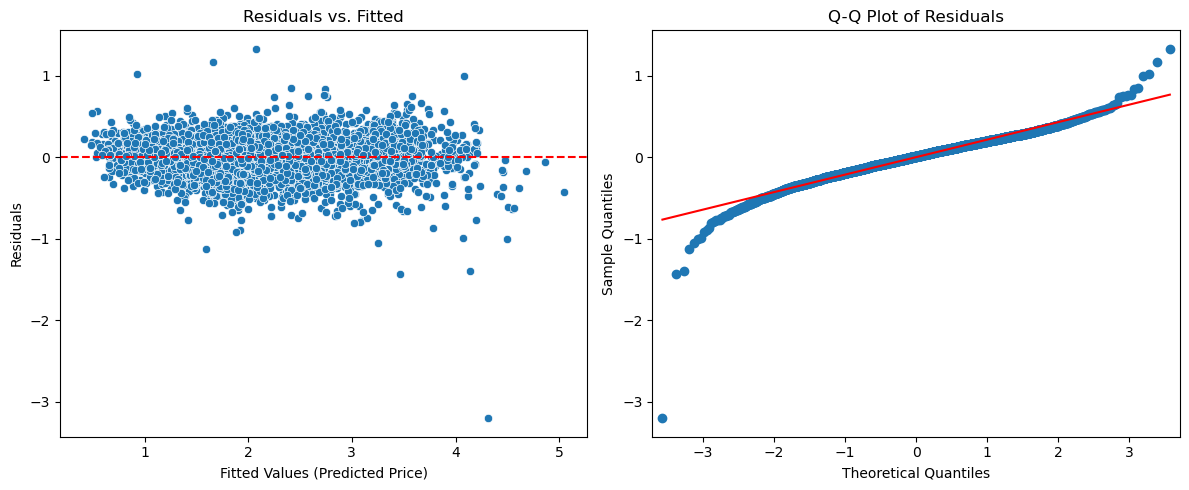

In [232]:
fitted_values = model_slr.fittedvalues
residuals = model_slr.resid

plt.figure(figsize=(12, 5))

# 1. Residuals vs. Fitted Plot
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals, ax=ax1)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title('Residuals vs. Fitted')
ax1.set_xlabel('Fitted Values (Predicted Price)')
ax1.set_ylabel('Residuals')

# 2. Q-Q Plot
ax2 = plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=ax2)
ax2.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

Nel **grafico dei residui** notiamo che la nuvola è abbastaza centrata nel valore zero, indicando che il modello cattura abbastanza bene la curva. Tuttavia più ci spostiamo a destra e più i punti iniziano a cadere, significa che per previzioni di prezzi più alti, auto di lusso o premium, il modello sovrastima il valore reale di vendita e quindi sbaglia molto. Possibile underfitting.

Nel **Q-Q plot** i residui tendono a seguire la retta, indicando che la loro distribuzione tende a quella Gaussiana (normale), tuttavia i valori ai lati si discostano indicando che ci sono dei prezzi che il modello non riesce a capire.

---

## 2.2 Analisi Predittiva e Machine Learning

In questa fase l'obiettivo è creare un **modello predittivo** che funzioni su **dati nuovi e mai visti**. Ci avvicineremo sempre di più all'approccio **Machine Learning**, perdendo via via interpretabilità del modello ma cercando il miglior trade-off tra **bias e varianza**.

### 2.2.1 Definizione del Problema e del Valore Pratico

**Progetto**: **`AutoPrice AI`** --> Algoritmo di Pricing per il mercato delle automobili 

#### 1. Scenario Applicativo

A partire da questo dataset, possiamo creare un **modello** che miri proprio a questo, a predire il prezzo di vendita di un’automobile usata. Abbiamo quindi ipotizzato la creazione di un **tool** che abbia come scopo quello di **assistere l'utente** nel capire il valore della propria auto o nel definire un prezzo di vendita competitivo.

Nel nostro caso, disponiamo di informazioni riguardanti unicamente il **mercato indiano**, pertanto il nostro strumento si concentrerà nel predire i prezzi di vendita in quella specifica area geografica.

Si potrebbe integrare questo modello predittivo all'interno di una **piattaforma web** di compravendita di auto, oppure inserirlo nel gestionale di una **concessionaria** di automobili usate.

L'utente inserirà le **specifiche tecniche** di una vettura e il sistema utilizzerà l'algoritmo di Machine Learning per restituire una **previsione del prezzo di vendita**.

#### 2. Utilità della soluzione

Perché si sente il bisogno di risolvere questo problema? Alle volte capire a quale prezzo **mettere in vendita** la propria automobile oppure sapere se un prezzo per una vettura che vogliamo comprare è **ottimale** può essere molto difficile. Sono molti i fattori in gioco che **influenzano**  il prezzo di un'automobile.

Inoltre una piattaforma online che mostra un "*prezzo consigliato dall'IA*" aumenta la **trasparenza**, incrementanto la probabilità di contatto tra **venditore ed acquirente**.

#### 3. Quantificazione del Valore Aggiunto

I concessionari inoltre riuscirebbero a **risparmiare** sul personale che ha il solo compito di stimare il valore di una vettura, potendo contare su uno strumento più **economico**, più **veloce** e più **affidabile**.

Si eviterebbero quindi **errori di stima**, inoltre gli utenti privati potranno qundi anche **proteggersi** da strategie aggressive dei venditori, potento conoscere il reale prezzo di vendita/valore di una vettura.



Abbiamo già adottato un **semplice modello** **lineare** ed abbiamo ottenuto dei risultati veramente ottimi, esso riusciva già a spiegare il **91%** della **varianza** (R-score 0.913) nel dataset. 

Per questo, data anche la **natura del nostro obiettivo** (Pricing), abbiamo scelto di mantenere l'**approccio di Regressione** per predire il valore dell'auto.

### 2.2.2 Setup Sperimentale

Da adesso è importante la performance sui dati nuovi e mai visti, per questo adesso **divideremo** il nostro dataset in 2 parti:
- **Train set**, il più massiccio, conterrà il 80% delle osservazioni, sarà il set su cui alleneremo i nostri modelli.
- **Test set**, coprirà il 20% del dataset, servirà come test finale sul nostro modello che considereremo come migliore, da usare solamente una volta.

In questa fase, è opportuno trasformare i nostri dati in modo che possano essere interpretati correttamente dai modelli di Machine Learning:
- **Trasformazioni Logaritmiche**: applichiamo una trasformazione logaritmica alle variabili `Kilometers_Driven`, `Engine` e `Power`. Queste feature presentano distribuzioni fortemente asimmetriche (long-tailed) che si discostano dalla normalità; la trasformazione aiuta a stabilizzare la varianza e permette al modello di catturare meglio le relazioni non lineari.

- **Feature Scaling**: applichiamo lo scaling a tutte le variabili continue. Questo passaggio è fondamentale affinché tutte le feature abbiano la stessa scala di grandezza, evitando che variabili con valori numerici elevati (come i chilometri) dominino su quelle con range ridotti durante la fase di ottimizzazione. Lo scaling porterà tutte le feature a media 0 e varianza 1.

Inoltre, durante la fase di **Understanding** è emerso che la variabile `Seats` era **statisticamente non significativa**. Tuttavia le regolarizzazzioni riusciranno a mitigare questo problema quindi la mantenaimo.

In [233]:
# Setup del dataset e variabili
y = y_modeling.copy()
X = X_modeling.copy()

# Applicazione delle trasformazioni logartmiche
X['Kilometers_Driven'] = np.log1p(X['Kilometers_Driven'])
X['Engine'] = np.log1p(X['Engine'])
X['Power'] = np.log1p(X['Power'])

vars_to_dummy = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Location', 'Brand_Category', 'Seats']
X = pd.get_dummies(X, columns=vars_to_dummy, dtype=int)


Nella nostra **pipeline** inizieremo con la creazione di un modello "baseline" (o "dumb") di riferimento. Si tratterà di una **regressione lineare standard** (come quella applicata nella parte precedente) che, come fatto prima, richiede l’applicazione del One-Hot Encoding con la **rimozione** di una categoria di riferimento (baseline) dalle variabili categoriche. Questo passaggio era fondamentale per evitare la **multicollinearità perfetta**, che avrebbo reso instabili i coefficienti del modello.

Adesso abbiamo ricalcolato le variabili dummy, aggiungendo anche la categoria precedentemente scartata, percheé quando applicheremo i modelli con la **regolarizzazione Ridge e Lasso** essi aggiungeranno una **penalità** nella funzione analitica che riuscirà a mitigare i difetti della multicollinearità.

In [234]:
from sklearn.model_selection import train_test_split

# Split: Train e Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Sets Proportions:")
print(f"X:\t\t{X.shape}\t Prop: {X.shape[0]/X.shape[0]:.1f}")
print(f"X_train:\t{X_train.shape}\t Prop: {X_train.shape[0]/X.shape[0]:.1f}")
print(f"X_test:\t\t{X_test.shape}\t Prop: {X_test.shape[0]/X.shape[0]:.1f}")

Sets Proportions:
X:		(5709, 34)	 Prop: 1.0
X_train:	(4567, 34)	 Prop: 0.8
X_test:		(1142, 34)	 Prop: 0.2


Lo scaling delle feature deve essere **calibrata solo** sul Train set per evitare il fenomeno del "Data Leakage", il modello non deve "sapere" nulla sulla media o sulla deviazione standard del Test Set **prima di essere valutato**.

In [ ]:
from sklearn.preprocessing import StandardScaler

# 5. Data Normalization (Scaling)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

### 2.2.3 Modellazione e Selezione

Come detto prima creeremo vari modelli e li confronteremo per trovare il **migliore**. Il confronto verrà fatto sulla base di varie metriche che spiegheremo in seguito.

Andremo a vedere modelli Supervised e modelli Unsupervised.

Nei modelli Supervised andremo a provare la regolarizzazzione su modelli di Regressione Lineare e Polinomiale.

Nei modelli Unsupervised andremo a diminuire il numero di componenti del nostro spazio delle feature, tentando di rendere meno complessi nostri modelli. Applicheremo comunque dei modelli di Regressione per predire il prezzo.

Durante la creazione dei vari modelli, applicheremo la tecnica della regolarizzazione, che permette di attenuare il **peso dei coefficienti** sul modello, consentendo tra le altre cose di eliminare la multicollinearità:
- **Regolarizzazione Ridge (L2)**, attenua i coefficienti ma non li elimina
- **Regolarizzazione Lasso (L1)**, più drastico, può portare i coefficienti a zero, eliminandoli

Data la presenza di iperparametri da ottimizzare (tranne nella regressione lineaer semplice), adotteremo una strategia di **K-Fold Cross-Validation**. Questa tecnica prevede la suddivisione del dataset in $K$ parti: il modello viene addestrato su $K - 1$ parti e validato sulla rimanente, ripetendo il processo per $K$ iterazioni fino a quando ogni parte non è stata utilizzata come set di validazione. Il risultato finale sarà dato dalla media delle performance ottenute. Abbiamo scelto questo approccio poiché il nostro dataset non è molto grande e vogliamo garantire una valutazione più affidabile e meno dipendente da un singolo split. Per implementare questa procedura in modo efficiente e trovare i migliori iperparametri, utilizzeremo **GridSearchCV**.

Per la nostra K-Fold CV adotteremo una divisione in 5 parti, un giusto compromesso adatto alle dimensioni del nostro dataset.

#### Modelli Lineari

In [236]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

Procediamo con la creazione dei **modelli lineari**. L'unico iperparametro da impostare è $\alpha$, ovvero la **forza della regolarizzazzione**:
- Nella Ridge Regression abbiamo testato valori da 0.1 a 1000 per **gestire eventuali correlazioni** tra le variabili senza escluderle.
- Nella Lasso Regression abbiamo usato valori più piccoli (da 0.0001 a 10) perché questo modello è **più aggressivo** e tende ad azzerare le variabili meno importanti per semplificare il modello.

Per il Lasso abbiamo impostato **max_iter** a 10000. Questa scelta è necessaria perché l'algoritmo di calcolo del Lasso ha bisogno di più passaggi per arrivare alla soluzione corretta, specialmente quando cerchiamo parametri molto precisi.

Inoltre il modello finale scelto dallo script è quello che **minimizza** il Mean Square Error.

In [237]:
# Fissiamo il grado a 1 per la regressione lineare semplice
degree_lr = 1

# 1. Configurazione Metriche
metrics = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

# --- 1. REGRESSIONE LINEARE SEMPLICE ---
pipeline_lr = Pipeline([
    ('poly', PolynomialFeatures(degree=degree_lr)),
    ('model', LinearRegression())
])

gs_lr = GridSearchCV(pipeline_lr, param_grid={}, cv=5, scoring=metrics, refit='MSE')
gs_lr.fit(X_train, y_train)

best_idx_lr = gs_lr.best_index_
res_lr = gs_lr.cv_results_

auto_usate_result = pd.DataFrame({
    'Method': ['Linear Simple'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}".format(degree_lr)],
    'R2': [res_lr['mean_test_R2'][best_idx_lr]],
    'MAE': [res_lr['mean_test_MAE'][best_idx_lr] * -1],
    'MSE': [res_lr['mean_test_MSE'][best_idx_lr] * -1],
    'RMSE': [res_lr['mean_test_RMSE'][best_idx_lr] * -1]
})

# --- 2. RIDGE LINEAR REGRESSION ---
polynomial_regressor_ridge = Pipeline([
    ('polynomial_expansion', PolynomialFeatures(degree=degree_lr)),
    ('ridge_regression', Ridge())
])

ridge_param_grid = {
    'ridge_regression__alpha': [0.1, 1, 10, 50, 100, 200, 400, 600, 1000]
}

gs_ridge = GridSearchCV(polynomial_regressor_ridge, param_grid=ridge_param_grid, cv=5, scoring=metrics, refit='MSE')
gs_ridge.fit(X_train, y_train)

best_alpha_ridge = gs_ridge.best_params_['ridge_regression__alpha']
best_idx_ridge = gs_ridge.best_index_
res_ridge = gs_ridge.cv_results_

new_row_ridge = pd.DataFrame({
    'Method': ['Linear Ridge'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}, Alpha: {}".format(degree_lr, best_alpha_ridge)],
    'R2': [res_ridge['mean_test_R2'][best_idx_ridge]],
    'MAE': [res_ridge['mean_test_MAE'][best_idx_ridge] * -1],
    'MSE': [res_ridge['mean_test_MSE'][best_idx_ridge] * -1],
    'RMSE': [res_ridge['mean_test_RMSE'][best_idx_ridge] * -1]
})
auto_usate_result = pd.concat([auto_usate_result, new_row_ridge], ignore_index=True)

# --- 3. LASSO REGRESSION ---
polynomial_regressor_lasso = Pipeline([
    ('polynomial_expansion', PolynomialFeatures(degree=degree_lr)),
    ('lasso_regression', Lasso(max_iter=10000))
])

lasso_param_grid = {
    'lasso_regression__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

gs_lasso = GridSearchCV(polynomial_regressor_lasso, param_grid=lasso_param_grid, cv=5, scoring=metrics, refit='MSE')
gs_lasso.fit(X_train, y_train)

best_alpha_lasso = gs_lasso.best_params_['lasso_regression__alpha']
best_idx_lasso = gs_lasso.best_index_
res_lasso = gs_lasso.cv_results_

new_row_lasso = pd.DataFrame({
    'Method': ['Linear Lasso'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}, Alpha: {}".format(degree_lr, best_alpha_lasso)],
    'R2': [res_lasso['mean_test_R2'][best_idx_lasso]],
    'MAE': [res_lasso['mean_test_MAE'][best_idx_lasso] * -1],
    'MSE': [res_lasso['mean_test_MSE'][best_idx_lasso] * -1],
    'RMSE': [res_lasso['mean_test_RMSE'][best_idx_lasso] * -1]
})
auto_usate_result = pd.concat([auto_usate_result, new_row_lasso], ignore_index=True)

auto_usate_result

,Method,Validation,Parameters,R2,MAE,MSE,RMSE
0,Linear Simple,K-Fold CV: 5,Degree: 1,0.918614,0.154454,0.042627,0.206144
1,Linear Ridge,K-Fold CV: 5,"Degree: 1, Alpha: 10",0.918732,0.154197,0.042567,0.205976
2,Linear Lasso,K-Fold CV: 5,"Degree: 1, Alpha: 0.0001",0.918681,0.154380,0.042592,0.206047


Vediamo cosa vogliono significare queste metriche:
- **MAE (Mean Absolute Error)**: Rappresenta la media degli errori assoluti. Ci dice, in media, di quanto la previsione si discosta dal valore reale. È la metrica più intuitiva perché mantiene l'unità di misura della variabile target.

- **MSE (Mean Squared Error)**: Calcola la media dei quadrati degli errori. Elevando al quadrato, penalizza molto più pesantemente gli errori grandi (outlier) rispetto a quelli piccoli. È utile in fase di addestramento per "costringere" il modello a non commettere errori grossolani.

- **RMSE (Root Mean Squared Error)**: È la radice quadrata dell'MSE. Riporta l'errore alla stessa unità di misura del target (come il MAE), ma rimane più sensibile agli outlier rispetto a quest'ultimo.

Nel nostro caso, la variabile target è il logaritmo del prezzo ($\ln(Price)$). Questo cambia il modo in cui leggiamo i risultati:
1. **L'Errore come Percentuale**: Grazie alle proprietà dei logaritmi, un errore nei "log" si traduce approssimativamente in un errore percentuale sul prezzo reale.
- - Il nostro MAE di 0.154 significa che il modello ha un errore medio del 15.4%. Se un'auto costa 1.000.000 di Rupie, il modello sbaglia in media di 154.000 Rupie.
2. **Sensibilità agli Outlier (RMSE vs MAE)**: Il nostro RMSE (0.206) è leggermente superiore al MAE (0.154). Questa differenza ci indica che nel dataset sono presenti degli outlier (auto con prezzi molto particolari, magari molto vecchie ma ben tenute, o auto di lusso con svalutazioni anomale) che il modello fatica a prevedere con precisione, generando errori più grandi che alzano il valore dell'RMSE.

#### Modelli Polinomiali

Nel complesso abbiamo già degli ottimi risultati. Dobbiamo continuare implementando gli altri modelli.

Adesso andiamo a catturare quelle **relazioni non lineari**. In questo tipo di algoritmo è necessario andare a cercare il valore adatto dell'**iperparametro k**, ovvero il grado del polinomio. Se troppo basso cadiamo nell'underfitting perché non riusciamo a catturare la curva, al contrario se troppo alto cadiamo nell'overfitting.

In questo script abbiamo adottato le stesse scelte della procedura precedente. Tuttavia adesso abbiamo un iperparametro in più, ovvero il **grado del polinomio** $K$ della curva.

Abbiamo impostato solamente 1,2,3 come possibile grado k perché con cifre più alte ci metterebbe troppo tempo a **convergere**, visto la quantità di variabili che abbiamo.

In [238]:
# 1. Configurazione Metriche
metrics = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

# Ricerca del grado migliore
find_degree_pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', Ridge())
])

degree_grid = {'poly__degree': [1, 2, 3]}

gs_degree = GridSearchCV(find_degree_pipe, param_grid=degree_grid, cv=5, scoring='neg_mean_squared_error')
gs_degree.fit(X_train, y_train)

best_degree = gs_degree.best_params_['poly__degree']
print("Grado ottimale individuato: {:>2}".format(best_degree))

# --- 4. REGRESSIONE POLINOMIALE SEMPLICE ---
poly_simple_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree)),
    ('model', LinearRegression())
])

gs_poly_simple = GridSearchCV(poly_simple_pipe, param_grid={}, cv=5, scoring=metrics, refit='MSE')
gs_poly_simple.fit(X_train, y_train)

res_ps = gs_poly_simple.cv_results_
idx_ps = gs_poly_simple.best_index_

# Creazione riga per Polynomial Simple
new_row_poly = pd.DataFrame({
    'Method': ['Polynomial Simple'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}".format(best_degree)],
    'R2': [res_ps['mean_test_R2'][idx_ps]],
    'MAE': [res_ps['mean_test_MAE'][idx_ps] * -1],
    'MSE': [res_ps['mean_test_MSE'][idx_ps] * -1],
    'RMSE': [res_ps['mean_test_RMSE'][idx_ps] * -1]
})

auto_usate_result = pd.concat([auto_usate_result, new_row_poly], ignore_index=True)

# --- 5. REGRESSIONE POLINOMIALE RIDGE ---
poly_ridge_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree)),
    ('model', Ridge())
])

ridge_params = {'model__alpha': [0.1, 1, 10, 50, 100, 200, 400, 600, 1000]}

gs_ridge = GridSearchCV(poly_ridge_pipe, param_grid=ridge_params, cv=5, scoring=metrics, refit='MSE')
gs_ridge.fit(X_train, y_train)

res_pr = gs_ridge.cv_results_
idx_pr = gs_ridge.best_index_
best_alpha_ridge = gs_ridge.best_params_['model__alpha']

new_row_ridge = pd.DataFrame({
    'Method': ['Polynomial Ridge'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}, Alpha: {}".format(best_degree, best_alpha_ridge)],
    'R2': [res_pr['mean_test_R2'][idx_pr]],
    'MAE': [res_pr['mean_test_MAE'][idx_pr] * -1],
    'MSE': [res_pr['mean_test_MSE'][idx_pr] * -1],
    'RMSE': [res_pr['mean_test_RMSE'][idx_pr] * -1]
})

auto_usate_result = pd.concat([auto_usate_result, new_row_ridge], ignore_index=True)

# --- 6. REGRESSIONE POLINOMIALE LASSO ---
poly_lasso_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree)),
    ('model', Lasso(max_iter=10000))
])

lasso_params = {'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

gs_lasso = GridSearchCV(poly_lasso_pipe, param_grid=lasso_params, cv=5, scoring=metrics, refit='MSE')
gs_lasso.fit(X_train, y_train)

res_pl = gs_lasso.cv_results_
idx_pl = gs_lasso.best_index_
best_alpha_lasso = gs_lasso.best_params_['model__alpha']

# Creazione riga per Polynomial Lasso
new_row_lasso = pd.DataFrame({
    'Method': ['Polynomial Lasso'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}, Alpha: {}".format(best_degree, best_alpha_lasso)],
    'R2': [res_pl['mean_test_R2'][idx_pl]],
    'MAE': [res_pl['mean_test_MAE'][idx_pl] * -1],
    'MSE': [res_pl['mean_test_MSE'][idx_pl] * -1],
    'RMSE': [res_pl['mean_test_RMSE'][idx_pl] * -1]
})

auto_usate_result = pd.concat([auto_usate_result, new_row_lasso], ignore_index=True)

# Cerchiamo il modello minore
best_model_idx = auto_usate_result['MSE'].idxmin()

best_model_name = auto_usate_result.loc[best_model_idx, 'Method']
best_model_mse = auto_usate_result.loc[best_model_idx, 'MSE']

print(f"Modello migliore: {best_model_name}")
print(f"MSE: {best_model_mse}")

auto_usate_result

Grado ottimale individuato:  2
Modello migliore: Polynomial Ridge
MSE: 0.032986838967071455


,Method,Validation,Parameters,R2,MAE,MSE,RMSE
0,Linear Simple,K-Fold CV: 5,Degree: 1,0.918614,0.154454,0.042627,0.206144
1,Linear Ridge,K-Fold CV: 5,"Degree: 1, Alpha: 10",0.918732,0.154197,0.042567,0.205976
2,Linear Lasso,K-Fold CV: 5,"Degree: 1, Alpha: 0.0001",0.918681,0.154380,0.042592,0.206047
3,Polynomial Simple,K-Fold CV: 5,Degree: 2,0.915694,0.137767,0.043567,0.206617
4,Polynomial Ridge,K-Fold CV: 5,"Degree: 2, Alpha: 10",0.936884,0.131281,0.032987,0.180998
5,Polynomial Lasso,K-Fold CV: 5,"Degree: 2, Alpha: 0.0001",0.936864,0.130953,0.032996,0.181015


Il confronto tra i modelli ha evidenziato i seguenti punti:

1. **Vantaggio del modello polinomiale** I modelli di grado 2 mostrano performance superiori rispetto a quelli lineari. Il miglioramento del coefficiente R2 (da 0.9187 di Linear Ridge a 0.9368 di Polynomial Ridge) conferma che la relazione tra le caratteristiche delle auto e il prezzo è modellata meglio da una curva che da una retta.

2. **Overfitting nel modello polinomiale semplice** Il modello Polynomial Simple presenta un R2 (0.9156) inferiore rispetto ai modelli lineari regolarizzati. Questo suggerisce che, senza un controllo sui pesi, l'aumento della complessità del modello ha portato a un leggero overfitting ai dati di training.

3. **Efficacia della regolarizzazione** L'uso di Ridge e Lasso è stato fondamentale per i modelli polinomiali. Polynomial Ridge e Polynomial Lasso hanno ottenuto i risultati migliori in assoluto, riducendo significativamente l'MSE (MSE passa da 0.0435 a 0.0329).

4. **Modello selezionato per il Test** Il modello vincitore è Polynomial Ridge (Degree: 2, Alpha: 10), che presenta l'MSE più basso (0.032987) e l'R2 più alto (0.9368).

Adesso passeremo al Test finale sul modello supervised migliore.

#### Performance sul Test Set

Adesso possiamo finalmente utilizzare il Test Set, andremo a vedere le performance del modello migliore selezionato precedentemente trai vari modelli supervisionati.

In [239]:
best_model_test = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10))
])

best_model_test.fit(X_train, y_train)

y_test_pred = best_model_test.predict(X_test)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

test_performance_result = pd.DataFrame({
    'Method': ['Best Model (Polynomial Ridge)'],
    'Dataset': ['Test Set'],
    'Parameters': ['Degree: 2, Alpha: 10'],
    'R2': [r2_test],
    'MAE': [mae_test],
    'MSE': [mse_test],
    'RMSE': [rmse_test]
})

test_performance_result

,Method,Dataset,Parameters,R2,MAE,MSE,RMSE
0,Best Model (Polynomial Ridge),Test Set,"Degree: 2, Alpha: 10",0.949238,0.12603,0.029505,0.171771


I risultati sul Test Set sono molto positivi e confermano la validità del modello:

- **Precisione del prezzo (MAE)** Il valore MAE di 0.1260 ci dice che, in media, il modello sbaglia di circa il 12.6% rispetto al prezzo reale dell'auto.

- **Affidabilità del modello (R2)** Il valore R2 di 0.9492 è molto molto buono. Significa che il modello riesce a spiegare quasi il 95% dei motivi per cui il prezzo di un'auto cambia.

- È interessante notare che le performance sul Test Set (R2: 0.9492) sono  migliori di quelle ottenute in Cross-Validation (R2: 0.9368). Questo è un ottimo segnale: significa che il modello non ha solo "imparato a memoria" i dati di addestramento, ma ha capito davvero cosa determina il valore di un'auto.

- **Errori minimi (RMSE)** Il valore RMSE di 0.1717 conferma che gli errori "grossolani" sono rari. Il modello è stabile e quasi mai fa sbagli enormi sulla valutazione del veicolo.

### 2.2.4 Unsupervised Learning

#### 1. Riduzione della Dimensionalità e Visualizzazzione (PCA)

A questo punto del progetto, intendiamo provare un modello in cui lo spazio delle feature venga ridotto tramite la PCA. Lo facciamo principalmente per due raioni:

- **Elevata dimensionalità**: L'utilizzo del One-Hot Encoding ha generato un numero considerevole di variabili dummy. La PCA ci permette di comprimere questo spazio, estraendo solo le componenti che catturano la massima varianza e scartando il "rumore" contenuto nelle variabili che danno meno informazione.

- **Risoluzione della Multicollinearità**: Alcuni dei nostri predittori mostrano una forte correlazione lineare tra loro (ad esempio Engine e Power). La PCA trasforma le variabili originali in un nuovo set di variabili ortogonali (le componenti principali), eliminando per costruzione ogni problema di multicollinearità e permettendo al modello di lavorare su informazioni non ridondanti.

L'obiettivo finale è verificare se un modello più "snello" possa mantenere (o migliorare) la capacità di generalizzazione, riducendo ulteriormente il rischio di overfitting e semplificando la struttura.

Quindi andremo a provare le nuove componenti all'interno di un modello di regressione e vedremo quale performa meglio, proprio come fatto prima.

##### Analisi della Varianza Spiegata

Attualmente il nostro dataset contiene più di 35 variabili, scegliere in quante componenti comprimrere le feature è quindi molto importante. Andremo a visualizzare un grafico che ci indicherà il numero di componenti principali ottimali da utilizzare.

Lo script esegue un'analisi della varianza spiegata tramite l'algoritmo PCA per determinare il numero ottimale di dimensioni necessarie a rappresentare il dataset. Attraverso il calcolo della varianza cumulativa, viene generato un grafico che permette di individuare visivamente il punto di equilibrio tra la riduzione della complessità e il mantenimento dell'informazione originale, identificando con precisione il numero di componenti necessarie a coprire il 90% della varianza totale.

Andremo a utilizzare il dataset elaborato nella fase di preprocessing, in quanto presenta le feature già scalate ed è già suddiviso nei set di Train e Test.

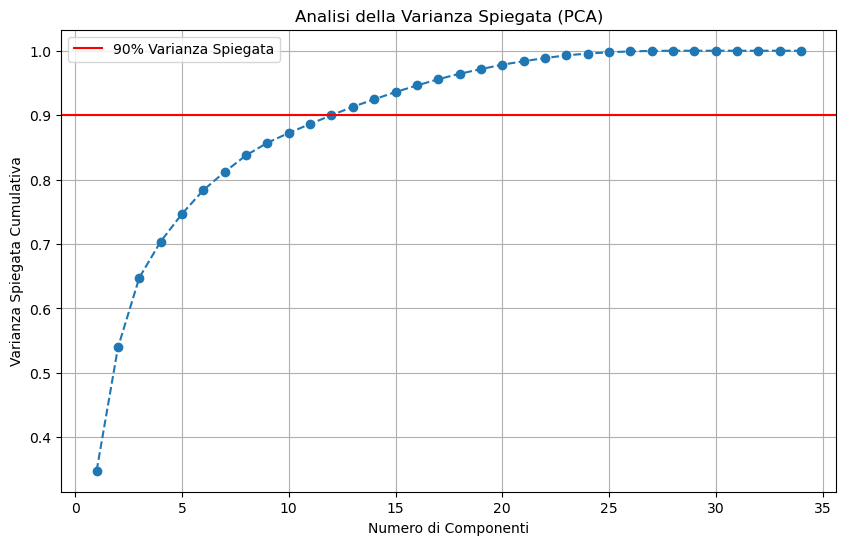

Servono 13 componenti per spiegare il 90% della varianza originale.


In [240]:
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(X_train)

# Calcolo della varianza spiegata cumulativa
cum_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_variance) + 1), cum_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Varianza Spiegata')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.title('Analisi della Varianza Spiegata (PCA)')
plt.grid(True)
plt.legend()
plt.show()

# Troviamo il numero esatto di componenti per il 90%
n_components_90 = np.argmax(cum_variance >= 0.90) + 1
print(f"Servono {n_components_90} componenti per spiegare il 90% della varianza originale.")

Il grafico ci indica che bastano 13 componenti principali per conservare il 90% dell'informazione originale.

##### Applicazione dei modelli lineari

Adesso andremo ad applicare i modelli utilizzati precedentemente, usando gli stessi script. Lo scopo e vedere adesso quale modello si comporta meglio con le nuove componenti calcolate.

In [241]:
# Ricalcoliamo i due set
pca_opt = PCA(n_components=n_components_90)
X_train_pca = pca_opt.fit_transform(X_train)
X_test_pca = pca_opt.transform(X_test)

In [242]:
# Fissiamo il grado a 1 per la regressione lineare semplice
degree_lr = 1

# 1. Configurazione Metriche
metrics = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

# --- 1. REGRESSIONE LINEARE SEMPLICE ---
pipeline_lr = Pipeline([
    ('poly', PolynomialFeatures(degree=degree_lr)),
    ('model', LinearRegression())
])

gs_lr = GridSearchCV(pipeline_lr, param_grid={}, cv=5, scoring=metrics, refit='MSE')
gs_lr.fit(X_train_pca, y_train)

best_idx_lr = gs_lr.best_index_
res_lr = gs_lr.cv_results_

new_slr_row = pd.DataFrame({
    'Method': ['Linear Simple PCA'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}".format(degree_lr)],
    'R2': [res_lr['mean_test_R2'][best_idx_lr]],
    'MAE': [res_lr['mean_test_MAE'][best_idx_lr] * -1],
    'MSE': [res_lr['mean_test_MSE'][best_idx_lr] * -1],
    'RMSE': [res_lr['mean_test_RMSE'][best_idx_lr] * -1]
})

auto_usate_result = pd.concat([auto_usate_result, new_slr_row], ignore_index=True)

# --- 2. RIDGE LINEAR REGRESSION ---
polynomial_regressor_ridge = Pipeline([
    ('polynomial_expansion', PolynomialFeatures(degree=degree_lr)),
    ('ridge_regression', Ridge())
])

ridge_param_grid = {
    'ridge_regression__alpha': [0.1, 1, 10, 50, 100, 200, 400, 600, 1000]
}

gs_ridge = GridSearchCV(polynomial_regressor_ridge, param_grid=ridge_param_grid, cv=5, scoring=metrics, refit='MSE')
gs_ridge.fit(X_train_pca, y_train)

best_alpha_ridge = gs_ridge.best_params_['ridge_regression__alpha']
best_idx_ridge = gs_ridge.best_index_
res_ridge = gs_ridge.cv_results_

new_row_ridge = pd.DataFrame({
    'Method': ['Linear Ridge PCA'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}, Alpha: {}".format(degree_lr, best_alpha_ridge)],
    'R2': [res_ridge['mean_test_R2'][best_idx_ridge]],
    'MAE': [res_ridge['mean_test_MAE'][best_idx_ridge] * -1],
    'MSE': [res_ridge['mean_test_MSE'][best_idx_ridge] * -1],
    'RMSE': [res_ridge['mean_test_RMSE'][best_idx_ridge] * -1]
})
auto_usate_result = pd.concat([auto_usate_result, new_row_ridge], ignore_index=True)

# --- 3. LASSO REGRESSION ---
polynomial_regressor_lasso = Pipeline([
    ('polynomial_expansion', PolynomialFeatures(degree=degree_lr)),
    ('lasso_regression', Lasso(max_iter=10000))
])

lasso_param_grid = {
    'lasso_regression__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

gs_lasso = GridSearchCV(polynomial_regressor_lasso, param_grid=lasso_param_grid, cv=5, scoring=metrics, refit='MSE')
gs_lasso.fit(X_train_pca, y_train)

best_alpha_lasso = gs_lasso.best_params_['lasso_regression__alpha']
best_idx_lasso = gs_lasso.best_index_
res_lasso = gs_lasso.cv_results_

new_row_lasso = pd.DataFrame({
    'Method': ['Linear Lasso PCA'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}, Alpha: {}".format(degree_lr, best_alpha_lasso)],
    'R2': [res_lasso['mean_test_R2'][best_idx_lasso]],
    'MAE': [res_lasso['mean_test_MAE'][best_idx_lasso] * -1],
    'MSE': [res_lasso['mean_test_MSE'][best_idx_lasso] * -1],
    'RMSE': [res_lasso['mean_test_RMSE'][best_idx_lasso] * -1]
})
auto_usate_result = pd.concat([auto_usate_result, new_row_lasso], ignore_index=True)

In [243]:
# 1. Configurazione Metriche
metrics = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2'
}

# Ricerca del grado migliore
find_degree_pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', Ridge())
])

degree_grid = {'poly__degree': [1, 2, 3]}

gs_degree = GridSearchCV(find_degree_pipe, param_grid=degree_grid, cv=5, scoring='neg_mean_squared_error')
gs_degree.fit(X_train_pca, y_train)

best_degree = gs_degree.best_params_['poly__degree']
print("Grado ottimale individuato: {:>2}".format(best_degree))

# --- 4. REGRESSIONE POLINOMIALE SEMPLICE ---
poly_simple_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree)),
    ('model', LinearRegression())
])

gs_poly_simple = GridSearchCV(poly_simple_pipe, param_grid={}, cv=5, scoring=metrics, refit='MSE')
gs_poly_simple.fit(X_train_pca, y_train)

res_ps = gs_poly_simple.cv_results_
idx_ps = gs_poly_simple.best_index_

# Creazione riga per Polynomial Simple
new_row_poly = pd.DataFrame({
    'Method': ['Polynomial Simple PCA'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}".format(best_degree)],
    'R2': [res_ps['mean_test_R2'][idx_ps]],
    'MAE': [res_ps['mean_test_MAE'][idx_ps] * -1],
    'MSE': [res_ps['mean_test_MSE'][idx_ps] * -1],
    'RMSE': [res_ps['mean_test_RMSE'][idx_ps] * -1]
})

auto_usate_result = pd.concat([auto_usate_result, new_row_poly], ignore_index=True)

# --- 5. REGRESSIONE POLINOMIALE RIDGE ---
poly_ridge_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree)),
    ('model', Ridge())
])

ridge_params = {'model__alpha': [0.1, 1, 10, 50, 100, 200, 400, 600, 1000]}

gs_ridge = GridSearchCV(poly_ridge_pipe, param_grid=ridge_params, cv=5, scoring=metrics, refit='MSE')
gs_ridge.fit(X_train_pca, y_train)

res_pr = gs_ridge.cv_results_
idx_pr = gs_ridge.best_index_
best_alpha_ridge = gs_ridge.best_params_['model__alpha']

new_row_ridge = pd.DataFrame({
    'Method': ['Polynomial Ridge PCA'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}, Alpha: {}".format(best_degree, best_alpha_ridge)],
    'R2': [res_pr['mean_test_R2'][idx_pr]],
    'MAE': [res_pr['mean_test_MAE'][idx_pr] * -1],
    'MSE': [res_pr['mean_test_MSE'][idx_pr] * -1],
    'RMSE': [res_pr['mean_test_RMSE'][idx_pr] * -1]
})

auto_usate_result = pd.concat([auto_usate_result, new_row_ridge], ignore_index=True)

# --- 6. REGRESSIONE POLINOMIALE LASSO ---
poly_lasso_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=best_degree)),
    ('model', Lasso(max_iter=10000))
])

lasso_params = {'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

gs_lasso = GridSearchCV(poly_lasso_pipe, param_grid=lasso_params, cv=5, scoring=metrics, refit='MSE')
gs_lasso.fit(X_train_pca, y_train)

res_pl = gs_lasso.cv_results_
idx_pl = gs_lasso.best_index_
best_alpha_lasso = gs_lasso.best_params_['model__alpha']

# Creazione riga per Polynomial Lasso
new_row_lasso = pd.DataFrame({
    'Method': ['Polynomial Lasso PCA'],
    'Validation': ['K-Fold CV: 5'],
    'Parameters': ["Degree: {}, Alpha: {}".format(best_degree, best_alpha_lasso)],
    'R2': [res_pl['mean_test_R2'][idx_pl]],
    'MAE': [res_pl['mean_test_MAE'][idx_pl] * -1],
    'MSE': [res_pl['mean_test_MSE'][idx_pl] * -1],
    'RMSE': [res_pl['mean_test_RMSE'][idx_pl] * -1]
})

auto_usate_result = pd.concat([auto_usate_result, new_row_lasso], ignore_index=True)

Grado ottimale individuato:  2


Cerchiamo il modello migliore.

In [244]:

# Cerchiamo il modello minore
best_model_idx = auto_usate_result['MSE'].idxmin()

best_model_name = auto_usate_result.loc[best_model_idx, 'Method']
best_model_mse = auto_usate_result.loc[best_model_idx, 'MSE']

print(f"Modello migliore: {best_model_name}")
print(f"MSE: {best_model_mse}")

auto_usate_result


Modello migliore: Polynomial Ridge
MSE: 0.032986838967071455


,Method,Validation,Parameters,R2,MAE,MSE,RMSE
0,Linear Simple,K-Fold CV: 5,Degree: 1,0.918614,0.154454,0.042627,0.206144
1,Linear Ridge,K-Fold CV: 5,"Degree: 1, Alpha: 10",0.918732,0.154197,0.042567,0.205976
2,Linear Lasso,K-Fold CV: 5,"Degree: 1, Alpha: 0.0001",0.918681,0.154380,0.042592,0.206047
3,Polynomial Simple,K-Fold CV: 5,Degree: 2,0.915694,0.137767,0.043567,0.206617
4,Polynomial Ridge,K-Fold CV: 5,"Degree: 2, Alpha: 10",0.936884,0.131281,0.032987,0.180998
5,Polynomial Lasso,K-Fold CV: 5,"Degree: 2, Alpha: 0.0001",0.936864,0.130953,0.032996,0.181015
6,Linear Simple PCA,K-Fold CV: 5,Degree: 1,0.896014,0.175758,0.054524,0.233213
7,Linear Ridge PCA,K-Fold CV: 5,"Degree: 1, Alpha: 1",0.896015,0.175757,0.054523,0.233213
8,Linear Lasso PCA,K-Fold CV: 5,"Degree: 1, Alpha: 0.0001",0.896019,0.175762,0.054521,0.233209
9,Polynomial Simple PCA,K-Fold CV: 5,Degree: 2,0.927697,0.142998,0.037851,0.193943


Analizziamo i risultati:
- Il miglior modello pre-PCA (R2: 0.936, Polynomial Ridge) è superiore alla sua controparte PCA (R2: 0.8960, Polynomial Ridge). Questo indica che la compressione delle feature, pur semplificando il dataset, ha comportato la perdita di una piccola frazione di informazione utile alla stima precisa del prezzo.

- La Regolarizzazione Ridge riesce maggiormente a migliorare le performance.

- Nei modelli basati su PCA, la differenza tra regressione semplice, Ridge e Lasso è diventata quasi impercettibile. Questo accade perché la PCA genera componenti tra loro non correlate (ortogonali), risolvendo alla radice il problema della multicollinearità che la regolarizzazione Ridge solitamente si trova a gestire.

##### Visualizzazione

Adesso andremo a proiettare le nostre osservazioni in uno spazio 2d, applicando una PCA a 2 componenti, lo scopo è vedere se troviamo cluster naturali.

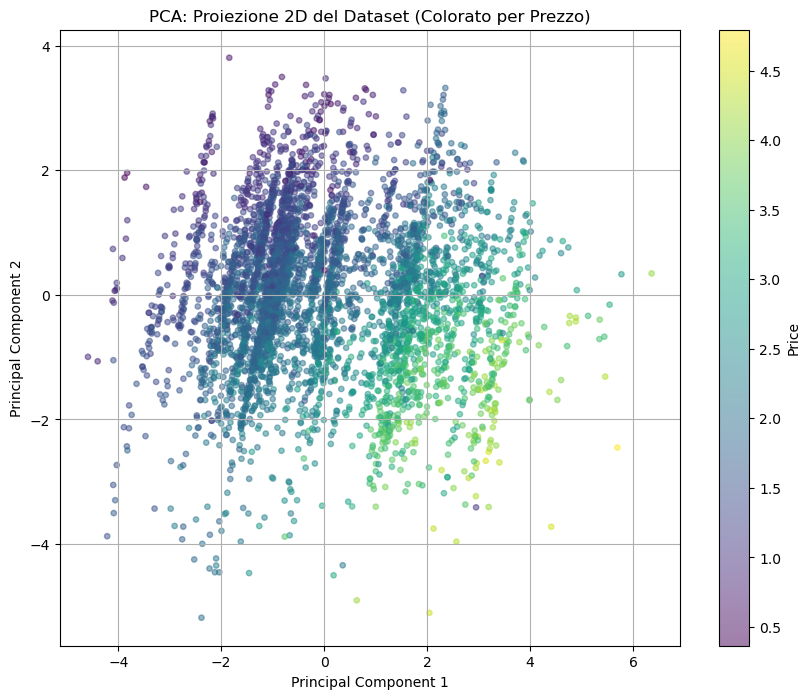

In [245]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train_pca)

plt.figure(figsize=(10, 8))
# Scatter plot: X=PC1, Y=PC2, Colore=Prezzo
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                      c=y_train, cmap='viridis', alpha=0.5, s=15)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Proiezione 2D del Dataset (Colorato per Prezzo)')
plt.colorbar(scatter, label='Price')
plt.grid(True)
plt.show()

Notiamo che nello spazio 2D, c'è una divisione netta. Le auto costose (punti chiari/gialli) si concentrano a destra, mentre quelle economiche (punti scuri/viola) a sinistra.

#### 2. Riorganizzazione dei Dati tramite Clustering 

Abbiamo visto che le auto, proiettare su uno spazio 2d, tendono a **raggrupparsi** in maniera naturale, abbiamo quindi decisio di scavare più a fondo.

##### Numero di gruppi ottimale

Procederemo ora all'implementazione dell'**Elbow Method** utilizzando i dati precedentemente trasformati con la PCA. L'obiettivo è individuare il numero ideale di gruppi in cui suddividere le auto usate per ottimizzare la **divisione del mercato**.

Lo script calcola l'inerzia (la somma dei quadrati delle distanze dei campioni dal centro del cluster più vicino) per un intervallo di **cluster** da 1 a 10. Attraverso la visualizzazione del grafico, cercheremo il "punto di flesso" dove l'aggiunta di ulteriori cluster smette di apportare una **riduzione** significativa dell'inerzia, indicando il valore di K più bilanciato.

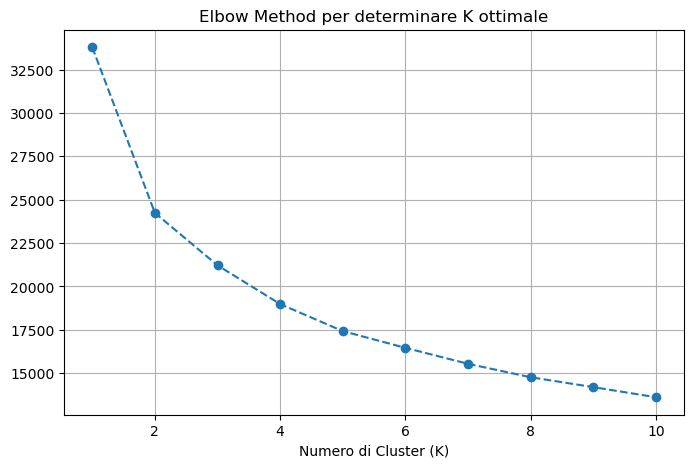

In [247]:
from sklearn.cluster import KMeans

X_for_clustering = X_train_pca 

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_for_clustering)
    inertia.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Numero di Cluster (K)')
plt.title('Elbow Method per determinare K ottimale')
plt.grid(True)
plt.show()

Dobbiamo andare a cercare il punto più in basso a sinistra.

La curva inizia a flettersi di meno intorno k=2 o k=3.

L'obiettivo adesso è suddividere il dataset per **ridurre la sua complessità**, in modo da cercare dei "profili veicolo".

##### Modello KMeans

Applichiamo questo modello non supervisionato con k = 3:

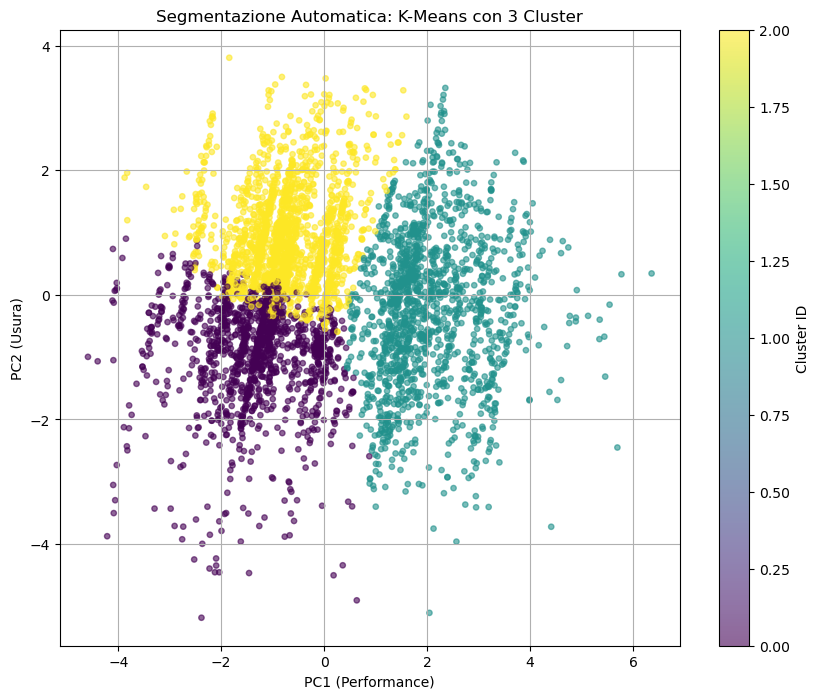

In [ ]:
k_scelto = 3
kmeans_final = KMeans(n_clusters=k_scelto, random_state=42, n_init=10)

cluster_labels = kmeans_final.fit_predict(X_train_pca)

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                      c=cluster_labels, cmap='viridis', alpha=0.6, s=15)

plt.xlabel('PC1 (Performance)')
plt.ylabel('PC2 (Usura)')
plt.title(f'Segmentazione Automatica: K-Means con {k_scelto} Cluster')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True)
plt.show()

In [257]:
df_train_analysis = X_train.copy() # Dati originali
df_train_analysis['Cluster'] = cluster_labels
df_train_analysis['Price_Real'] = np.exp(y_train) - 1 # Rimettiamo il prezzo in Lahk (da Log)

# Raggruppiamo per Cluster e vediamo le medie
profilo_cluster = df_train_analysis.groupby('Cluster')[['Price_Real']].mean()
profilo_cluster['Count'] = df_train_analysis['Cluster'].value_counts()

print("--- PROFILO DEI SEGMENTI DI MERCATO ---")
print(profilo_cluster.round(1))

--- PROFILO DEI SEGMENTI DI MERCATO ---
         Price_Real  Count
Cluster                   
0               6.5   1327
1              19.0   1482
2               4.0   1758


Il nostro modello di clustering sembra aver individuato 3 classi di auto distinte:
- Auto Economiche: prezzo medio 4 Lahk
- Auto di Fascia Media: prezzo medio 6.5 Lahk
- Auto di Lusso: prezzo medio 19 Lahk

## 2.3 Colcusioni

In questa sezione di **modeling**, abbiamo affrontato il problema della valutazione delle auto usate attraverso due approcci: la capacità predittiva e la segmentazione del mercato.

L'implementazione del modello di regressione ha confermato che variabili tecniche come la **potenza del motore** (Power) e l'**anzianità del veicolo** (Age) esercitano l'influenza maggiore nel determinare il valore dell'auto. La robustezza del modello, ci permette di stimare con un grado di precisione soddisfacente il prezzo di vendita, fornendo uno **strumento concreto** per l'analisi quantitativa del mercato indiano.

Il modello migliore è quello che fa uso di **Regressione Polinomiale con Regolarizzazzione Ridge**, con un polinomio di grado 2 e alpha pari a 10. Commette un errore medio sul prezzo pari al 17%, un grado **errore soddisfacente** considerando che in genere previsioni del genere sono molto difficili.

L'applicazione di una riduzione in componenti principali non sembra offrire performance migliori sui nostri modelli, indicando come tutti i dati a nostra disposizioni **riescano molto bene a spiegare** le variazioni del prezzo di vendita delle auto.

Parallelamente, l'analisi di Clustering ha rivelato una struttura interna del dataset coerente con quello che ci aspettavamo. Abbiamo individuato tre segmenti distinti: Auto Economiche, Fascia Media e Lusso. Questo ci indica che: 

- **Il mercato è polarizzato**, esisteono molte vendite su veicoli a basso costo, dove la concorrenza potrebbe essere elevata elevata.

- Il segmento "Lusso" (media 19 Lakh) mostra un **comportamento diverso,** dove il brand e le specifiche tecniche pesano molto più del chilometraggio.

- La classe intermedia funge da **ponte**.

Per concludere, il passaggio dai dati grezzi ai modelli ci ha permesso di trasformare semplici osservazioni in uno **strumento funzionante e utile**. I modelli sviluppati non solo riescono a spiegare in maniera ottimale la realtà, ma forniscono le basi per altre prvisioni future o per l'integrazione di nuovi dati.